# Installs and Imports

In [ ]:
# Install required packages

!pip install -q transformers
!pip install -q hazm
!pip install -q clean-text[gpl]
!pip install pyyaml==5.4.1
!pip install Jinja2
!pip install markupsafe==2.0.1

     |████████████████████████████████| 4.9 MB 7.4 MB/s 
     |████████████████████████████████| 120 kB 57.7 MB/s 
     |████████████████████████████████| 6.6 MB 42.4 MB/s 
     |████████████████████████████████| 316 kB 8.5 MB/s 
     |████████████████████████████████| 233 kB 56.1 MB/s 
     |████████████████████████████████| 1.4 MB 43.8 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 175 kB 19.0 MB/s 
     |████████████████████████████████| 235 kB 51.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 8.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whee

In [ ]:
# Import required packages

import numpy as np
import pandas as pd
import csv

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle

import hazm
from cleantext import clean

import plotly.express as px
import plotly.graph_objects as go

import yaml

from datetime import datetime

from matplotlib import pyplot as plt

from tqdm.notebook import tqdm

import os
import re
import json
import copy
import collections


# Price Data

Price Data Cleaning

In [ ]:
from pandas.core.frame import DataFrame
trade_history_df = pd.read_csv("/content/drive/MyDrive/trades_history_daily.csv")

trade_history_df["price_change"] = trade_history_df['finish_price'] - trade_history_df['yesterday_price']

def price_column_changer(x):
  if x>0:
    return 1
  elif x==0 :
    return 0
  else:
    return -1

trade_history_df.price_change = trade_history_df.price_change.apply(price_column_changer)


shapna_history_df = trade_history_df[trade_history_df.symbol_id == 83]. reset_index(drop=True)
akhaber_history_df = trade_history_df[trade_history_df.symbol_id == 87]. reset_index(drop=True)
shbandar_history_df = trade_history_df[trade_history_df.symbol_id == 99]. reset_index(drop=True)
fmeli_history_df = trade_history_df[trade_history_df.symbol_id == 195]. reset_index(drop=True)
vebmellat_history_df = trade_history_df[trade_history_df.symbol_id == 207]. reset_index(drop=True)
foolad_history_df = trade_history_df[trade_history_df.symbol_id == 302]. reset_index(drop=True)
kachad_history_df = trade_history_df[trade_history_df.symbol_id == 317]. reset_index(drop=True)
khodro_history_df = trade_history_df[trade_history_df.symbol_id == 355]. reset_index(drop=True)
hkeshti_history_df = trade_history_df[trade_history_df.symbol_id == 404]. reset_index(drop=True)
shasta_history_df = trade_history_df[trade_history_df.symbol_id == 2254]. reset_index(drop=True)

def add_price_two_days_ago(dataframe):
  dataframe['price_day_t-2'] = dataframe['yesterday_price'].shift()

add_price_two_days_ago(shapna_history_df)
shapna_history_df = shapna_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(akhaber_history_df)
akhaber_history_df = akhaber_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(shbandar_history_df)
shbandar_history_df = shbandar_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(fmeli_history_df)
fmeli_history_df = fmeli_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(vebmellat_history_df)
vebmellat_history_df = vebmellat_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(foolad_history_df)
foolad_history_df = foolad_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(kachad_history_df)
kachad_history_df = kachad_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(khodro_history_df)
khodro_history_df = khodro_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(hkeshti_history_df)
hkeshti_history_df = hkeshti_history_df.dropna(subset=['price_day_t-2'])

add_price_two_days_ago(shasta_history_df)
shasta_history_df = shasta_history_df.dropna(subset=['price_day_t-2'])

shapna_history_df.head()

,symbol_id,first_price,last_price,finish_price,min_trade_price,max_trade_price,yesterday_price,created_at,price_change,price_day_t-2
1,83,12000,11870,11900,11620,12440,12230,2021-01-03 12:30:00,-1,12850.0
2,83,12100,12230,12150,11730,12450,11900,2021-01-04 12:30:00,1,12230.0
3,83,12150,11550,11640,11550,12250,12150,2021-01-05 12:30:00,-1,11900.0
4,83,11550,11060,11100,11060,11550,11640,2021-01-06 12:30:00,-1,12150.0
5,83,10570,10590,10620,10550,11190,11100,2021-01-09 12:30:00,-1,11640.0


# Price Only Method

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def traintestsplit(df):
  X = df[['yesterday_price', 'price_day_t-2']]
  y = df['price_change']
  X_train = X[:int(0.8*len(X))]
  X_test = X[int(0.8*len(X)):]
  y_train = y[:int(0.8*len(X))]
  y_test = y[int(0.8*len(X)):]
  return X_train.values, X_test.values, y_train.values, y_test.values

In [ ]:
def logisticregression(X_train, X_test, y_train, y_test):
  df_model = LogisticRegression(random_state = 0)
  df_model.fit(X_train,y_train)
  df_pred = df_model.predict(X_test)
  print(classification_report(y_test, df_pred))

In [ ]:
def svm(X_train, X_test, y_train, y_test):
  df_model = SVC(kernel = 'rbf', gamma = 0.5, C=2)
  df_model.fit(X_train,y_train)
  df_pred = df_model.predict(X_test)
  print(classification_report(y_test, df_pred))

In [ ]:
def randomforest(X_train, X_test, y_train, y_test):
  df_model = RandomForestClassifier(random_state = 0)
  df_model.fit(X_train,y_train)
  df_pred = df_model.predict(X_test)
  print(classification_report(y_test, df_pred))

Shapna

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shapna_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.47      0.82      0.60        28
           1       0.71      0.32      0.44        38

    accuracy                           0.53        66
   macro avg       0.59      0.57      0.52        66
weighted avg       0.61      0.53      0.50        66



In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.42      1.00      0.60        28
           1       0.00      0.00      0.00        38

    accuracy                           0.42        66
   macro avg       0.21      0.50      0.30        66
weighted avg       0.18      0.42      0.25        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.42      0.79      0.55        28
           1       0.57      0.21      0.31        38

    accuracy                           0.45        66
   macro avg       0.50      0.50      0.43        66
weighted avg       0.51      0.45      0.41        66



Shbandar

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shbandar_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.45      1.00      0.62        26
           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        29

    accuracy                           0.45        58
   macro avg       0.15      0.33      0.21        58
weighted avg       0.20      0.45      0.28        58



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.45      1.00      0.62        26
           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        29

    accuracy                           0.45        58
   macro avg       0.15      0.33      0.21        58
weighted avg       0.20      0.45      0.28        58



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        26
           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67        29

    accuracy                           0.50        58
   macro avg       0.17      0.33      0.22        58
weighted avg       0.25      0.50      0.33        58



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fmeli

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(fmeli_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.55      0.90      0.68        30
           0       0.00      0.00      0.00         7
           1       0.59      0.34      0.43        29

    accuracy                           0.56        66
   macro avg       0.38      0.41      0.37        66
weighted avg       0.51      0.56      0.50        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.45      1.00      0.62        30
           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        29

    accuracy                           0.45        66
   macro avg       0.15      0.33      0.21        66
weighted avg       0.21      0.45      0.28        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.48      0.97      0.64        30
           0       1.00      0.14      0.25         7
           1       0.75      0.10      0.18        29

    accuracy                           0.50        66
   macro avg       0.74      0.40      0.36        66
weighted avg       0.65      0.50      0.40        66



vebmellat

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(vebmellat_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.42      0.68      0.52        28
           0       0.00      0.00      0.00         2
           1       0.41      0.22      0.29        32

    accuracy                           0.42        62
   macro avg       0.28      0.30      0.27        62
weighted avg       0.40      0.42      0.38        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.45      1.00      0.62        28
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        32

    accuracy                           0.45        62
   macro avg       0.15      0.33      0.21        62
weighted avg       0.20      0.45      0.28        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.42      0.57      0.48        28
           0       0.00      0.00      0.00         2
           1       0.46      0.34      0.39        32

    accuracy                           0.44        62
   macro avg       0.29      0.31      0.29        62
weighted avg       0.43      0.44      0.42        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Foolad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(foolad_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.44      0.96      0.60        28
           0       0.00      0.00      0.00         6
           1       0.75      0.09      0.17        32

    accuracy                           0.45        66
   macro avg       0.40      0.35      0.26        66
weighted avg       0.55      0.45      0.34        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.42      1.00      0.60        28
           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        32

    accuracy                           0.42        66
   macro avg       0.14      0.33      0.20        66
weighted avg       0.18      0.42      0.25        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.45      0.64      0.53        28
           0       0.50      0.17      0.25         6
           1       0.58      0.44      0.50        32

    accuracy                           0.50        66
   macro avg       0.51      0.42      0.43        66
weighted avg       0.52      0.50      0.49        66



Kachad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(kachad_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.47      0.25      0.33        28
           0       0.00      0.00      0.00         3
           1       0.52      0.74      0.61        35

    accuracy                           0.50        66
   macro avg       0.33      0.33      0.31        66
weighted avg       0.47      0.50      0.46        66



In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           0       0.00      0.00      0.00         3
           1       0.53      1.00      0.69        35

    accuracy                           0.53        66
   macro avg       0.18      0.33      0.23        66
weighted avg       0.28      0.53      0.37        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           0       0.00      0.00      0.00         3
           1       0.54      1.00      0.70        35

    accuracy                           0.53        66
   macro avg       0.18      0.33      0.23        66
weighted avg       0.29      0.53      0.37        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Khodro

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(khodro_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.52      0.97      0.67        31
           1       0.83      0.15      0.26        33

    accuracy                           0.55        64
   macro avg       0.68      0.56      0.47        64
weighted avg       0.68      0.55      0.46        64



In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.48      1.00      0.65        31
           1       0.00      0.00      0.00        33

    accuracy                           0.48        64
   macro avg       0.24      0.50      0.33        64
weighted avg       0.23      0.48      0.32        64



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.51      0.77      0.62        31
           1       0.59      0.30      0.40        33

    accuracy                           0.53        64
   macro avg       0.55      0.54      0.51        64
weighted avg       0.55      0.53      0.50        64



Hkeshti

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(hkeshti_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.40      1.00      0.57        27
           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        39

    accuracy                           0.40        67
   macro avg       0.13      0.33      0.19        67
weighted avg       0.16      0.40      0.23        67



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.40      1.00      0.57        27
           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        39

    accuracy                           0.40        67
   macro avg       0.13      0.33      0.19        67
weighted avg       0.16      0.40      0.23        67



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.41      0.67      0.51        27
           0       0.00      0.00      0.00         1
           1       0.61      0.36      0.45        39

    accuracy                           0.48        67
   macro avg       0.34      0.34      0.32        67
weighted avg       0.52      0.48      0.47        67



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Shasta

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shasta_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.53      1.00      0.69        30
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        25

    accuracy                           0.53        57
   macro avg       0.18      0.33      0.23        57
weighted avg       0.28      0.53      0.36        57



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.52      0.97      0.67        30
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        25

    accuracy                           0.51        57
   macro avg       0.17      0.32      0.22        57
weighted avg       0.27      0.51      0.35        57



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        30
           0       0.00      0.00      0.00         2
           1       0.44      1.00      0.61        25

    accuracy                           0.44        57
   macro avg       0.15      0.33      0.20        57
weighted avg       0.19      0.44      0.27        57



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Akhaber

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(akhaber_history_df)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.59      0.89      0.71        38
           0       0.00      0.00      0.00         4
           1       0.50      0.17      0.25        24

    accuracy                           0.58        66
   macro avg       0.36      0.35      0.32        66
weighted avg       0.52      0.58      0.50        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.58      1.00      0.73        38
           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        24

    accuracy                           0.58        66
   macro avg       0.19      0.33      0.24        66
weighted avg       0.33      0.58      0.42        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.64      0.84      0.73        38
           0       0.00      0.00      0.00         4
           1       0.60      0.38      0.46        24

    accuracy                           0.62        66
   macro avg       0.41      0.41      0.40        66
weighted avg       0.59      0.62      0.59        66



# Sentiment Model

## Train Text Messages

cleaning

In [ ]:
train_text_df = pd.read_csv('/content/drive/MyDrive/telebourse_messages.csv')

# print data information
print('data information')
print(train_text_df.info(), '\n')

# print missing values information
print('missing values stats')
print(train_text_df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(train_text_df[train_text_df['value'].isnull()].iloc[:5], '\n')

train_text_df["text"] = [str(x).replace(':',' ') for x in train_text_df["text"]]

train_text_df.head()

data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36239 entries, 0 to 36238
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   36239 non-null  object
 1   type    36239 non-null  object
 2   text    36074 non-null  object
dtypes: object(3)
memory usage: 849.5+ KB
None 

missing values stats
value      0
type       0
text     165
dtype: int64 

some missing values
Empty DataFrame
Columns: [value, type, text]
Index: [] 



,value,type,text
0,N,N,بازار با تعادل میان خریداران و فروشندگان در مد...
1,N,N,⚪️یکشنبه 1400/05/24\n\n🔹 پر حجم ترین صف های خر...
2,N,N,#مديريت \n\n🔺 مسدود نمودن دسترسي معامله گران ب...
3,N,N,☑️عرضه اولیه #مدیریت\n\n\n🗓تاریخ عرضه چهارشنب...
4,N,N,عرضه اولیه #مدیریت\n\n زمان ثبت سفارش ۰۹ ۳۰ ا...


**Normalization / Preprocessing**

The comments have different lengths based on words! Detecting the most normal range could help us find the maximum length of the sequences for the preprocessing step. On the other hand, we suppose that the minimum word combination for having a meaningful phrase for our learning process is 2.

In [ ]:
# calculate the length of comments based on their words
train_text_df['message_len_by_words'] = train_text_df['text'].apply(lambda t: len(hazm.word_tokenize(t)))

In [ ]:
min_max_len = train_text_df["message_len_by_words"].min(), train_text_df["message_len_by_words"].max()
print(f'Min: {min_max_len[0]} \tMax: {min_max_len[1]}')

Min: 1 	Max: 983


In [ ]:
def data_gl_than(data, less_than=100.0, greater_than=0.0, col='message_len_by_words'):
    data_length = data[col].values

    data_glt = sum([1 for length in data_length if greater_than < length <= less_than])

    data_glt_rate = (data_glt / len(data_length)) * 100

    print(f'Texts with word length of greater than {greater_than} and less than {less_than} includes {data_glt_rate:.2f}% of the whole!')

In [ ]:
data_gl_than(train_text_df, 256, 2)

Texts with word length of greater than 2 and less than 256 includes 94.67% of the whole!


In [ ]:
minlim, maxlim = 2, 256
# remove comments with the length of fewer than two words
train_text_df['message_len_by_words'] = train_text_df['message_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else None)
train_text_df = train_text_df.dropna(subset=['message_len_by_words'])
train_text_df = train_text_df.reset_index(drop=True)
print(train_text_df.head())

  value type                                               text  \
0     N    N  بازار با تعادل میان خریداران و فروشندگان در مد...   
1     N    N  ⚪️یکشنبه 1400/05/24\n\n🔹 پر حجم ترین صف های خر...   
2     N    N  #مديريت \n\n🔺 مسدود نمودن دسترسي معامله گران ب...   
3     N    N  ☑️عرضه اولیه #مدیریت\n\n\n🗓تاریخ عرضه  چهارشنب...   
4     N    N  عرضه اولیه #مدیریت\n\n زمان ثبت سفارش  ۰۹ ۳۰ ا...   

   message_len_by_words  
0                  40.0  
1                  86.0  
2                  84.0  
3                  34.0  
4                  11.0  


In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=train_text_df['message_len_by_words']
))

fig.update_layout(
    title_text='Distribution of word counts within messages',
    xaxis_title_text='Word Count',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

**Our cleaned method includes these steps:**

fixing unicodes

removing specials like a phone number, email, url, new lines, ...

cleaning HTMLs

normalizing

removing emojis

In [ ]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext


def cleaning(text):
    #text = text.strip()

    # regular cleaning

    text = clean(text,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
    )

    # cleaning htmls
    text = cleanhtml(text)

    # normalizing
    normalizer = hazm.Normalizer()
    text = normalizer.normalize(text)

    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        # u"\u200c"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    text = re.sub("\n+"," ", text)

    return text

In [ ]:
# cleaning comments
train_text_df['cleaned_text'] = train_text_df['text'].apply(cleaning)


# calculate the length of comments based on their words
train_text_df['cleaned_text_len_by_words'] = train_text_df['text'].apply(lambda t: len(hazm.word_tokenize(t)))

# remove comments with the length of fewer than two words
train_text_df['cleaned_text_len_by_words'] = train_text_df['cleaned_text_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else len_t)
train_text_df = train_text_df.dropna(subset=['cleaned_text_len_by_words'])
train_text_df = train_text_df.reset_index(drop=True)

train_text_df.head()

,value,type,text,message_len_by_words,cleaned_text,cleaned_text_len_by_words
0,N,N,بازار با تعادل میان خریداران و فروشندگان در مد...,40.0,بازار با تعادل میان خریداران و فروشندگان در مد...,40
1,N,N,⚪️یکشنبه 1400/05/24\n\n🔹 پر حجم ترین صف های خر...,86.0,یکشنبه ۱۴۰۰/۰۵/۲۴ پر حجم‌ترین صف‌های خرید بازا...,86
2,N,N,#مديريت \n\n🔺 مسدود نمودن دسترسي معامله گران ب...,84.0,مدیریت مسدود نمودن دسترسی معامله گران برخط وغی...,84
3,N,N,☑️عرضه اولیه #مدیریت\n\n\n🗓تاریخ عرضه چهارشنب...,34.0,عرضه اولیه مدیریت تاریخ عرضه چهارشنبه ۲۰ مرداد...,34
4,N,N,عرضه اولیه #مدیریت\n\n زمان ثبت سفارش ۰۹ ۳۰ ا...,11.0,عرضه اولیه مدیریت زمان ثبت سفارش ۰۹ ۳۰ الی ۱۲ ۰۰,11


In [ ]:
train_text_df = train_text_df[['cleaned_text', 'value']]
train_text_df.columns = ['text', 'value']
train_text_df.head()

,text,value
0,بازار با تعادل میان خریداران و فروشندگان در مد...,N
1,یکشنبه ۱۴۰۰/۰۵/۲۴ پر حجم‌ترین صف‌های خرید بازا...,N
2,مدیریت مسدود نمودن دسترسی معامله گران برخط وغی...,N
3,عرضه اولیه مدیریت تاریخ عرضه چهارشنبه ۲۰ مرداد...,N
4,عرضه اولیه مدیریت زمان ثبت سفارش ۰۹ ۳۰ الی ۱۲ ۰۰,N


In [ ]:
labels = list(sorted(train_text_df['value'].unique()))
print(f'We have #{len(labels)} labels: {labels}')

We have #3 labels: ['B', 'N', 'S']


## Handling Unbalanced Data

In [ ]:
fig = go.Figure()

groupby_label = train_text_df.groupby('value')['value'].count()

fig.add_trace(go.Bar(
    x=list(sorted(groupby_label.index)),
    y=groupby_label.tolist(),
    text=groupby_label.tolist(),
    textposition='auto'
))

fig.update_layout(
    title_text='Distribution of label within messages [DATA]',
    xaxis_title_text='Label',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

## Train,Validation,Test split

In [ ]:
train_text_df['value_id'] = train_text_df['value'].apply(lambda t: labels.index(t))


train, test = train_test_split(train_text_df, test_size=0.1, random_state=1, stratify=train_text_df['value'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['value'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train, y_train = train['text'].values.tolist(), train['value_id'].values.tolist()
x_valid, y_valid = valid['text'].values.tolist(), valid['value_id'].values.tolist()
x_test, y_test = test['text'].values.tolist(), test['value_id'].values.tolist()

print(train.shape)
print(valid.shape)
print(test.shape)

(27787, 3)
(3088, 3)
(3431, 3)


## PyTorch

In [ ]:
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

import torch
import torch.nn as nn
import torch.nn.functional as F

### Configuration


In [ ]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [ ]:
# general config
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16

EPOCHS = 3
EEVERY_EPOCH = 1000
LEARNING_RATE = 2e-5
CLIP = 0.0

MODEL_NAME_OR_PATH = 'HooshvareLab/bert-fa-base-uncased'
OUTPUT_PATH = '/content/bert-fa-base-uncased-sentiment-taaghceh/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [ ]:
# create a key finder based on label 2 id and id to label

label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'B': 0, 'N': 1, 'S': 2}
id2label: {0: 'B', 1: 'N', 2: 'S'}


In [ ]:
# setup the tokenizer and configuration

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
config = BertConfig.from_pretrained(
    MODEL_NAME_OR_PATH, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "B",
    "1": "N",
    "2": "S"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B": 0,
    "N": 1,
    "S": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



## Input Embeddings

In [ ]:
idx = np.random.randint(0, len(train))
sample_message = train.iloc[idx]['text']
sample_label = train.iloc[idx]['value']

print(f'Sample: \n{sample_message}\n{sample_label}')

Sample: 
وسکاب مناسب خریدپله‌ای باقبول ریسک خرید هرشخص مدیریت هیچ مسئولیتی قبول نمیکنند حدضرر ۳۸۱
B


In [ ]:
tokens = tokenizer.tokenize(sample_message)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'  Comment: {sample_message}')
print(f'   Tokens: {tokenizer.convert_tokens_to_string(tokens)}')
print(f'Token IDs: {token_ids}')

  Comment: وسکاب مناسب خریدپله‌ای باقبول ریسک خرید هرشخص مدیریت هیچ مسئولیتی قبول نمیکنند حدضرر ۳۸۱
   Tokens: وسکاب مناسب خریدپلهای باقبول ریسک خرید هرشخص مدیریت هیچ مسيولیتی قبول نمیکنند حدضرر ۳۸۱
Token IDs: [4236, 11056, 4006, 3535, 42984, 2784, 12038, 6306, 6724, 3535, 33921, 3015, 3916, 3371, 20032, 5671, 6999, 4253, 18387, 40405]


In [ ]:
encoding = tokenizer.encode_plus(
    sample_message,
    max_length=32,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[    2,  4236, 11056,  4006,  3535, 42984,  2784, 12038,  6306,  6724,
          3535, 33921,  3015,  3916,  3371, 20032,  5671,  6999,  4253, 18387,
         40405,     4,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])
token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


In [ ]:
class TelebourseDataset(torch.utils.data.Dataset):
    """ Create a PyTorch dataset for Telebourse Messages. """

    def __init__(self, tokenizer, texts, values=None, label_list=None, max_len=128):
        self.texts = texts
        self.values = values
        self.has_value = isinstance(values, list) or isinstance(values, np.ndarray)

        self.tokenizer = tokenizer
        self.max_len = max_len


        self.label_map = {label: i for i, label in enumerate(label_list)} if isinstance(label_list, list) else {}

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])

        if self.has_value:
            value = self.label_map.get(str(self.values[item]), str(self.values[item]))

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')

        inputs = {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
        }

        if self.has_value:
            inputs['values'] = torch.tensor(value, dtype=torch.long)

        return inputs


def create_data_loader(x, y, tokenizer, max_len, batch_size, label_list):
    dataset = TelebourseDataset(
        texts=x,
        values=y,
        tokenizer=tokenizer,
        max_len=max_len,
        label_list=label_list)

    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [ ]:
label_list = ['B', 'N', 'S']
train_data_loader = create_data_loader(train['text'].to_numpy(), train['value'].to_numpy(), tokenizer, MAX_LEN, TRAIN_BATCH_SIZE, label_list)
valid_data_loader = create_data_loader(valid['text'].to_numpy(), valid['value'].to_numpy(), tokenizer, MAX_LEN, VALID_BATCH_SIZE, label_list)
test_data_loader = create_data_loader(test['text'].to_numpy(), None, tokenizer, MAX_LEN, TEST_BATCH_SIZE, label_list)

In [ ]:
sample_data = next(iter(train_data_loader))

print(sample_data.keys())

print(sample_data['text'])
print(sample_data['input_ids'].shape)
print(sample_data['input_ids'][0, :])
print(sample_data['attention_mask'].shape)
print(sample_data['attention_mask'][0, :])
print(sample_data['token_type_ids'].shape)
print(sample_data['token_type_ids'][0, :])
print(sample_data['values'].shape)
print(sample_data['values'][0])

dict_keys(['text', 'input_ids', 'attention_mask', 'token_type_ids', 'values'])
['ورود_و_خروج_پول ورود_پول_حقوقی وملل وبصادر ملت شپنا فملی وپاسار وپارس برکت واتی وپست کاوه شتران فارس بوعلی شبندر ما پترول سیتا اوا اپال بیشترین ورود پول حقوقی در تاریخ ۱۴۰۰/۰۳/۰۱ تا ساعت ۱۰ ۰۰ @bcrows', 'سیگنال بررسی غپآذر میتونید روی صفر تابلو یا مثبت ۱ بررسی کنید۱۴۰۰/۰۵/۱۱', 'سیمرغ زبینا میل به صف خرید', 'ورود_و_خروج_پول ورود_پول_حقیقی وبملت فزرین کاما خساپا وبصادر رمپنا وساپا دارا_یکم زپارس خودرو فردا کرمان حکشتی وخارزم البرز خبهمن شتران پالایش حریل پارسان بیشترین ورود پول حقیقی در تاریخ ۱۴۰۰/۰۳/۱۸ تا ساعت ۱۰ ۰۰ @bcrows', 'فرابورس مثبت ۳۲ مچ!!!', 'فاما صف خرید', 'مناسب برای نوسان گیری البرز خشرق خمحرکه دسبحا زملارد کماسه کاربرانی که از اندیکاتور itm استفاده میکنند این سهام را با اندیکاتور بررسی نمایند. @bourse۱۲۴a', 'ولغدر یک پله مناسب ورود', 'واچ_لیست منفی\u200cها و صف فروش\u200cهای قابل بررسی وپویا کسعدی زبینا زشریف کپرور ولبهمن ثبهساز دسینا شاوان زشگزا دکپسول وتوشه رنیک وکادو کمنگنز کحافظ سدور گروه س

In [ ]:
sample_test = next(iter(test_data_loader))
print(sample_test.keys())

dict_keys(['text', 'input_ids', 'attention_mask', 'token_type_ids'])


## Model

In [ ]:
class SentimentModel(nn.Module):

    def __init__(self, config):
        super(SentimentModel, self).__init__()

        self.bert = BertModel.from_pretrained(MODEL_NAME_OR_PATH)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, input_ids, attention_mask, token_type_ids):
        _, pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            return_dict=False)

        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()
pt_model = None

!nvidia-smi

Thu Sep  1 21:05:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pt_model = SentimentModel(config=config)
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


pt_model <class '__main__.SentimentModel'>


In [ ]:
# sample data output

sample_data_text = sample_data['text']
sample_data_input_ids = sample_data['input_ids']
sample_data_attention_mask = sample_data['attention_mask']
sample_data_token_type_ids = sample_data['token_type_ids']
sample_data_values = sample_data['values']

# available for using in GPU
sample_data_input_ids = sample_data_input_ids.to(device)
sample_data_attention_mask = sample_data_attention_mask.to(device)
sample_data_token_type_ids = sample_data_token_type_ids.to(device)
sample_data_values = sample_data_values.to(device)


# outputs = F.softmax(
#     pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids),
#     dim=1)

outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids)
_, preds = torch.max(outputs, dim=1)

print(outputs[:5, :])
print(preds[:5])

tensor([[-0.5274,  0.2686,  0.2471],
        [-0.3435,  0.0797,  0.0906],
        [-0.0388,  0.0761,  0.3238],
        [-0.2478,  0.2543,  0.4237],
        [-0.3079,  0.3108,  0.1237]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([1, 2, 2, 2, 1], device='cuda:0')


In [ ]:
def simple_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

def acc_and_f1(y_true, y_pred, average='weighted'):
    acc = simple_accuracy(y_true, y_pred)
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average=average)
    return {
        "acc": acc,
        "f1": f1,
    }

def y_loss(y_true, y_pred, losses):
    y_true = torch.stack(y_true).cpu().detach().numpy()
    y_pred = torch.stack(y_pred).cpu().detach().numpy()
    y = [y_true, y_pred]
    loss = np.mean(losses)

    return y, loss


def eval_op(model, data_loader, loss_fn):
    model.eval()

    losses = []
    y_pred = []
    y_true = []

    with torch.no_grad():
        for dl in tqdm(data_loader, total=len(data_loader), desc="Evaluation... "):

            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            values = dl['values']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            values = values.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)

            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            # calculate the batch loss
            loss = loss_fn(outputs, values)

            # accumulate all the losses
            losses.append(loss.item())

            y_pred.extend(preds)
            y_true.extend(values)

    eval_y, eval_loss = y_loss(y_true, y_pred, losses)
    return eval_y, eval_loss


def train_op(model,
             data_loader,
             loss_fn,
             optimizer,
             scheduler,
             step=0,
             print_every_step=100,
             eval=False,
             eval_cb=None,
             eval_loss_min=np.Inf,
             eval_data_loader=None,
             clip=0.0):

    model.train()

    losses = []
    y_pred = []
    y_true = []

    for dl in tqdm(data_loader, total=len(data_loader), desc="Training... "):
        step += 1

        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        values = dl['values']

        # move tensors to GPU if CUDA is available
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        values = values.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # compute predicted outputs by passing inputs to the model
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)

        # convert output probabilities to predicted class
        _, preds = torch.max(outputs, dim=1)

        # calculate the batch loss
        loss = loss_fn(outputs, values)

        # accumulate all the losses
        losses.append(loss.item())

        # compute gradient of the loss with respect to model parameters
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        # perform optimization step
        optimizer.step()

        # perform scheduler step
        scheduler.step()

        y_pred.extend(preds)
        y_true.extend(values)

        if eval:
            train_y, train_loss = y_loss(y_true, y_pred, losses)
            train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

            if step % print_every_step == 0:
                eval_y, eval_loss = eval_op(model, eval_data_loader, loss_fn)
                eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

                if hasattr(eval_cb, '__call__'):
                    eval_loss_min = eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min)

    train_y, train_loss = y_loss(y_true, y_pred, losses)

    return train_y, train_loss, step, eval_loss_min

In [ ]:
optimizer = AdamW(pt_model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)


def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)

        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))

            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss

        return eval_loss_min


    return eval_cb


for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        scheduler=scheduler,
        step=step,
        print_every_step=EEVERY_EPOCH,
        eval=True,
        eval_cb=eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=valid_data_loader,
        clip=CLIP)

    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

    eval_y, eval_loss = eval_op(
        model=pt_model,
        data_loader=valid_data_loader,
        loss_fn=loss_fn)

    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epochs... :   0%|          | 0/3 [00:00<?, ?it/s]

Training... :   0%|          | 0/1737 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

Epoch: 1/3...Step: 1000...Train Loss: 0.274317...Train Acc: 0.889...Valid Loss: 0.224918...Valid Acc: 0.918...
Validation loss decreased (inf --> 0.224918).  Saving model ...


Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

Training... :   0%|          | 0/1737 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

Epoch: 2/3...Step: 2000...Train Loss: 0.138770...Train Acc: 0.949...Valid Loss: 0.228148...Valid Acc: 0.921...


Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

Epoch: 2/3...Step: 3000...Train Loss: 0.126884...Train Acc: 0.953...Valid Loss: 0.199459...Valid Acc: 0.923...
Validation loss decreased (0.224918 --> 0.199459).  Saving model ...


Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

Training... :   0%|          | 0/1737 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

Epoch: 3/3...Step: 4000...Train Loss: 0.072306...Train Acc: 0.973...Valid Loss: 0.239770...Valid Acc: 0.921...


Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

Epoch: 3/3...Step: 5000...Train Loss: 0.056979...Train Acc: 0.981...Valid Loss: 0.242781...Valid Acc: 0.924...


Evaluation... :   0%|          | 0/193 [00:00<?, ?it/s]

In [ ]:
from matplotlib import pyplot

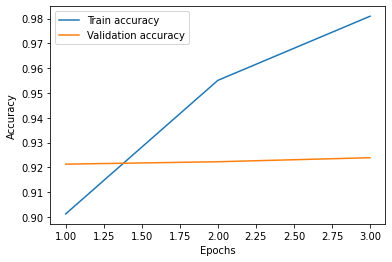

In [ ]:
pyplot.plot(range(1,4), history['train_acc'])
pyplot.plot(range(1,4), history['val_acc'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.legend(['Train accuracy', 'Validation accuracy'])

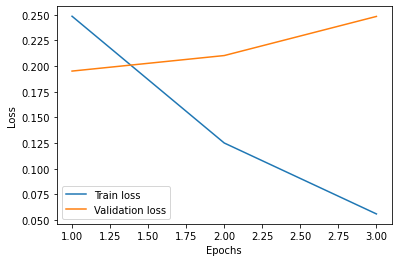

In [ ]:
pyplot.plot(range(1,4), history['train_loss'])
pyplot.plot(range(1,4), history['val_loss'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.legend(['Train loss', 'Validation loss'])

In [ ]:
torch.save(pt_model.state_dict(), '/content/drive/MyDrive/BSc_final_project_saved_weights.pt')

In [ ]:
#load weights of best model
path = '/content/drive/MyDrive/BSc_final_project_saved_weights.pt'
pt_model.load_state_dict(torch.load(path))

<All keys matched successfully>

## Prediction

In [ ]:
def predict(model, comments, tokenizer, max_len=128, batch_size=32):
    data_loader = create_data_loader(comments, None, tokenizer, max_len, batch_size, None)

    predictions = []
    prediction_probs = []


    model.eval()
    with torch.no_grad():
        for dl in tqdm(data_loader, position=0):
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)

            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(F.softmax(outputs, dim=1))

    predictions = torch.stack(predictions).cpu().detach().numpy()
    prediction_probs = torch.stack(prediction_probs).cpu().detach().numpy()

    return predictions, prediction_probs

In [ ]:
test_texts = test['text'].to_numpy()
preds, probs = predict(pt_model, test_texts, tokenizer, max_len=128)

print(preds.shape, probs.shape)
print(preds)

  0%|          | 0/108 [00:00<?, ?it/s]

(3431,) (3431, 3)
[1 1 1 ... 1 1 0]


In [ ]:
print(test.head())

                                                text value  value_id
0  رضوانی‌فر مدیرعامل شستا هیچ چیز به اندازه حذف ...     N         1
1  حفارس مثبت ۶ سفارس مثبت ۱ حفاری مثبت ۶ کپارس م...     N         1
2  فیلتر حجم مشکوک جهرم شزنگ شصدف ملت وسرضوی وسهر...     N         1
3   سود تقسیمی شرکتها وپخش زمان دریافت سود ۱۴۰۰٫۹...     N         1
4  کویر فالو ‌‌‌‏ سیگنال نیست خودتون بررسی کنین ل...     B         0


In [ ]:
y_test, y_pred = [label_list.index(label) for label in test['value'].values], preds

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print()
print(classification_report(y_test, y_pred, target_names=label_list))

F1: 0.9254579014883404

              precision    recall  f1-score   support

           B       0.86      0.84      0.85       815
           N       0.95      0.95      0.95      2590
           S       0.69      0.69      0.69        26

    accuracy                           0.93      3431
   macro avg       0.83      0.83      0.83      3431
weighted avg       0.93      0.93      0.93      3431



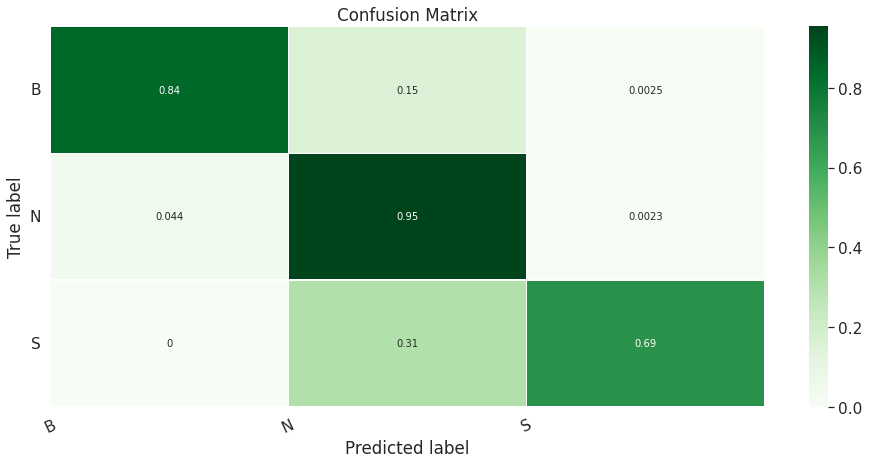

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['B','N','S']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Messages Data

In [ ]:
messages_df = pd.read_csv('/content/drive/MyDrive/message_symbol.csv')

In [ ]:
# cleaning comments
messages_df['cleaned_text'] = messages_df['text'].apply(cleaning)


# calculate the length of comments based on their words
messages_df['cleaned_text_len_by_words'] = messages_df['text'].apply(lambda t: len(hazm.word_tokenize(t)))

# remove comments with the length of fewer than two words
messages_df['cleaned_text_len_by_words'] = messages_df['cleaned_text_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else len_t)
messages_df = messages_df.dropna(subset=['cleaned_text_len_by_words'])
messages_df = messages_df.reset_index(drop=True)

messages_df.head()

,symbol_id,date,text,cleaned_text,cleaned_text_len_by_words
0,83,2021-01-01 06:30:04,#پتروشیمی #بورس_کالا #شپنا\n\nفروش فوق العاده ...,پتروشیمی بورس_کالا شپنا فروش فوق العاده شپنا د...,33
1,83,2021-01-01 07:02:37,سلام صبح بخیر دوستان\n\nخبرهایی که میاد بیرون...,سلام صبح بخیر دوستان خبرهایی که میاد بیرون در ...,91
2,83,2021-01-01 08:22:45,#شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ...,شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ح...,44
3,83,2021-01-01 08:33:39,#شپنا\n\nدر تصویر اول میزان فروش شپنا در ۱۱ رو...,شپنا در تصویر اول میزان فروش شپنا در ۱۱ روز او...,59
4,83,2021-01-01 09:02:41,#شپنا ➕دنبال کردن نماد\n\n‌‌‌‏✍️ احتمالا با رد...,شپنا دنبال کردن نماد ‌‌‌‏ احتمالا با رد کردن ۱...,43


In [ ]:
messages_texts = messages_df["text"].to_numpy()
preds, probs = predict(pt_model, messages_texts, tokenizer)



shapna_messages_df = messages_df[messages_df.symbol_id == 83]
akhaber_messages_df = messages_df[messages_df.symbol_id == 87]
shbandar_messages_df = messages_df[messages_df.symbol_id == 99]
fmelli_messages_df = messages_df[messages_df.symbol_id == 195]
vebmellat_messages_df = messages_df[messages_df.symbol_id == 207]
foolad_messages_df = messages_df[messages_df.symbol_id == 302]
kachad_messages_df = messages_df[messages_df.symbol_id == 317]
khodro_messages_df = messages_df[messages_df.symbol_id == 355]
hkeshti_messages_df = messages_df[messages_df.symbol_id == 404]
shasta_messages_df = messages_df[messages_df.symbol_id == 2254]

print(shasta_messages_df.head())
print(preds)

  0%|          | 0/3429 [00:00<?, ?it/s]

       symbol_id                 date  \
93300       2254  2021-01-01 07:10:53   
93301       2254  2021-01-01 09:23:20   
93302       2254  2021-01-01 10:17:52   
93303       2254  2021-01-01 12:16:26   
93304       2254  2021-01-01 15:31:26   

                                                    text  \
93300  تراز پول حقیقی در کلیت بازار بعد از بازگشایی ش...   
93301  #لپارس در یک کانال خنثی که کف آن ۱۲۴۴۰ و سقف آ...   
93302  #شستا ➕دنبال کردن نماد\n\n‌‌‌‏✍️ تایم فریم نیم...   
93303  #وبینار449\n\n✅تاریخ 99/10/10\n✅تعداد افراد حا...   
93304  #شستا ➕دنبال کردن نماد\n\n‌‌‌‏✍️ فقط یک دیدگاه...   

                                            cleaned_text  \
93300  تراز پول حقیقی در کلیت بازار بعد از بازگشایی ش...   
93301  لپارس در یک کانال خنثی که کف آن ۱۲۴۴۰ و سقف آن...   
93302  شستا دنبال کردن نماد ‌‌‌‏ تایم فریم نیم ساعته ...   
93303  وبینار۴۴۹ تاریخ ۹۹/۱۰/۱۰ تعداد افراد حاضر در و...   
93304  شستا دنبال کردن نماد ‌‌‌‏ فقط یک دیدگاه شخصی م...   

       cleaned_text_len_by_word

In [ ]:
messages_df["value"] = preds
print(preds.shape)
print(messages_df.head())
print(messages_texts.shape)


(109722,)
   symbol_id                 date  \
0         83  2021-01-01 06:30:04   
1         83  2021-01-01 07:02:37   
2         83  2021-01-01 08:22:45   
3         83  2021-01-01 08:33:39   
4         83  2021-01-01 09:02:41   

                                                text  \
0  #پتروشیمی #بورس_کالا #شپنا\n\nفروش فوق العاده ...   
1  سلام  صبح بخیر دوستان\n\nخبرهایی که میاد بیرون...   
2  #شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ...   
3  #شپنا\n\nدر تصویر اول میزان فروش شپنا در ۱۱ رو...   
4  #شپنا ➕دنبال کردن نماد\n\n‌‌‌‏✍️ احتمالا با رد...   

                                        cleaned_text  \
0  پتروشیمی بورس_کالا شپنا فروش فوق العاده شپنا د...   
1  سلام صبح بخیر دوستان خبرهایی که میاد بیرون در ...   
2  شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ح...   
3  شپنا در تصویر اول میزان فروش شپنا در ۱۱ روز او...   
4  شپنا دنبال کردن نماد ‌‌‌‏ احتمالا با رد کردن ۱...   

   cleaned_text_len_by_words  value  
0                         33      1  
1                

# Combining message data with price data

In [ ]:
shapna_messages_df = messages_df[messages_df.symbol_id == 83]
akhaber_messages_df = messages_df[messages_df.symbol_id == 87]
shbandar_messages_df = messages_df[messages_df.symbol_id == 99]
fmelli_messages_df = messages_df[messages_df.symbol_id == 195]
vebmellat_messages_df = messages_df[messages_df.symbol_id == 207]
foolad_messages_df = messages_df[messages_df.symbol_id == 302]
kachad_messages_df = messages_df[messages_df.symbol_id == 317]
khodro_messages_df = messages_df[messages_df.symbol_id == 355]
hkeshti_messages_df = messages_df[messages_df.symbol_id == 404]
shasta_messages_df = messages_df[messages_df.symbol_id == 2254]

more cleaning tables

In [ ]:
import os
os.makedirs('/content/drive/MyDrive', exist_ok=True)
messages_df.to_csv('/content/drive/MyDrive/message_df.csv')

In [ ]:
messages_df = pd.read_csv("/content/drive/MyDrive/message_df.csv")

In [ ]:
from datetime import timedelta

def value_changer(x):
  if x == 0:
    return 'B'
  elif x == 1:
    return 'N'
  else:
    return 'S'

messages_df.value = messages_df.value.apply(value_changer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,symbol_id,date,text,cleaned_text,cleaned_text_len_by_words,new_date
0,83,2021-01-01 06:30:04,#پتروشیمی #بورس_کالا #شپنا\n\nفروش فوق العاده ...,پتروشیمی بورس_کالا شپنا فروش فوق العاده شپنا د...,33,2020-12-31 18:00:04
1,83,2021-01-01 07:02:37,سلام صبح بخیر دوستان\n\nخبرهایی که میاد بیرون...,سلام صبح بخیر دوستان خبرهایی که میاد بیرون در ...,91,2020-12-31 18:32:37
2,83,2021-01-01 08:22:45,#شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ...,شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ح...,44,2020-12-31 19:52:45
3,83,2021-01-01 08:33:39,#شپنا\n\nدر تصویر اول میزان فروش شپنا در ۱۱ رو...,شپنا در تصویر اول میزان فروش شپنا در ۱۱ روز او...,59,2020-12-31 20:03:39
4,83,2021-01-01 09:02:41,#شپنا ➕دنبال کردن نماد\n\n‌‌‌‏✍️ احتمالا با رد...,شپنا دنبال کردن نماد ‌‌‌‏ احتمالا با رد کردن ۱...,43,2020-12-31 20:32:41


In [ ]:
def timechanger(df):
  df['date'] = pd.to_datetime(df['date'])
  df['new_date'] = df.date.apply(lambda x: x - timedelta(hours=12.5))
  df['new_date'] = pd.to_datetime(df['new_date'])
  df['new_time'] = [d.time() for d in df['new_date']]
  df['new_date'] = [d.date() for d in df['new_date']]

In [ ]:
timechanger(akhaber_messages_df)
timechanger(shbandar_messages_df)
timechanger(fmelli_messages_df)
timechanger(vebmellat_messages_df)
timechanger(foolad_messages_df)
timechanger(kachad_messages_df)
timechanger(khodro_messages_df)
timechanger(hkeshti_messages_df)
timechanger(shasta_messages_df)
timechanger(shapna_messages_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,symbol_id,date,text,cleaned_text,cleaned_text_len_by_words,value,new_date,new_time
0,83,2021-01-01 06:30:04,#پتروشیمی #بورس_کالا #شپنا\n\nفروش فوق العاده ...,پتروشیمی بورس_کالا شپنا فروش فوق العاده شپنا د...,33,N,2020-12-31,18:00:04
1,83,2021-01-01 07:02:37,سلام صبح بخیر دوستان\n\nخبرهایی که میاد بیرون...,سلام صبح بخیر دوستان خبرهایی که میاد بیرون در ...,91,N,2020-12-31,18:32:37
2,83,2021-01-01 08:22:45,#شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ...,شپنا در محدوده حمایتی مهمی قرار دارد و بنظرم ح...,44,N,2020-12-31,19:52:45
3,83,2021-01-01 08:33:39,#شپنا\n\nدر تصویر اول میزان فروش شپنا در ۱۱ رو...,شپنا در تصویر اول میزان فروش شپنا در ۱۱ روز او...,59,N,2020-12-31,20:03:39
4,83,2021-01-01 09:02:41,#شپنا ➕دنبال کردن نماد\n\n‌‌‌‏✍️ احتمالا با رد...,شپنا دنبال کردن نماد ‌‌‌‏ احتمالا با رد کردن ۱...,43,N,2020-12-31,20:32:41


In [ ]:
def new_message_table(df):
  df_table = pd.pivot_table(df, index=['new_date'],columns=['value'], aggfunc='size', fill_value = 0)
  df_table['date'] = df_table.index
  df_new = df_table.reset_index()
  df_new = df_new[['date','B','N','S']]
  return df_new

In [ ]:
shapna_df = new_message_table(shapna_messages_df)
akhaber_df = new_message_table(akhaber_messages_df)
shbandar_df = new_message_table(shbandar_messages_df)
fmeli_df = new_message_table(fmelli_messages_df)
vebmellat_df = new_message_table(vebmellat_messages_df)
foolad_df = new_message_table(foolad_messages_df)
kachad_df = new_message_table(kachad_messages_df)
khodro_df = new_message_table(khodro_messages_df)
hkeshti_df = new_message_table(hkeshti_messages_df)
shasta_df = new_message_table(shasta_messages_df)

In [ ]:
def yesterday_and_the_day_before_sentiment(df):
  df['date']=pd.to_datetime(df['date']).add(pd.offsets.Day(1))
  df['yesterday_B'] = df['B'].shift()
  df['yesterday_N'] = df['N'].shift()
  df['yesterday_S'] = df['S'].shift()

In [ ]:
yesterday_and_the_day_before_sentiment(shapna_df)
shapna_df = shapna_df.iloc[2:]
shapna_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(akhaber_df)
akhaber_df = akhaber_df.iloc[2:]
akhaber_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(shbandar_df)
shbandar_df = shbandar_df.iloc[2:]
shbandar_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(fmeli_df)
fmeli_df = fmeli_df.iloc[2:]
fmeli_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(vebmellat_df)
vebmellat_df = vebmellat_df.iloc[2:]
vebmellat_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(foolad_df)
foolad_df = foolad_df.iloc[2:]
foolad_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(kachad_df)
kachad_df = kachad_df.iloc[2:]
kachad_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(khodro_df)
khodro_df = khodro_df.iloc[2:]
khodro_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(hkeshti_df)
hkeshti_df = hkeshti_df.iloc[2:]
hkeshti_df.reset_index(inplace=True, drop = True)

yesterday_and_the_day_before_sentiment(shasta_df)
shasta_df = shasta_df.iloc[2:]
shasta_df.reset_index(inplace=True, drop = True)

In [ ]:
def preprocessHistoryDataframes_for_join(df):
  df['date'] = pd.to_datetime(df['created_at'])
  df['time'] = [d.time() for d in df['date']]
  df['date'] = [d.date() for d in df['date']]
  return df

,finish_price,yesterday_price,price_change,price_day_t-2,date
0,11900,12230,-1,12850.0,2021-01-03
1,12150,11900,1,12230.0,2021-01-04
2,11640,12150,-1,11900.0,2021-01-05
3,11100,11640,-1,12150.0,2021-01-06
4,10620,11100,-1,11640.0,2021-01-09


In [ ]:
preprocessHistoryDataframes_for_join(shapna_history_df)
shapna_history = shapna_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
shapna_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(akhaber_history_df)
akhaber_history = akhaber_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
akhaber_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(shbandar_history_df)
shbandar_history = shbandar_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
shbandar_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(fmeli_history_df)
fmeli_history = fmeli_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
fmeli_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(vebmellat_history_df)
vebmellat_history = vebmellat_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
vebmellat_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(foolad_history_df)
foolad_history = foolad_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
foolad_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(kachad_history_df)
kachad_history = kachad_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
kachad_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(khodro_history_df)
khodro_history = khodro_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
khodro_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(hkeshti_history_df)
hkeshti_history = hkeshti_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
hkeshti_history.reset_index(inplace= True, drop=True)

preprocessHistoryDataframes_for_join(shasta_history_df)
shasta_history = shasta_history_df[['finish_price','yesterday_price','price_change', 'price_day_t-2','date']]
shasta_history.reset_index(inplace= True, drop=True)

In [ ]:
def merg_tables(df_message, history_df):
  df_message['date'] = pd.to_datetime(df_message['date'],infer_datetime_format=True)
  history_df['date'] = pd.to_datetime(history_df['date'],infer_datetime_format=True)
  df = df_message.merge(history_df, on='date', how='left')
  return df

In [ ]:
shapna = merg_tables(shapna_df, shapna_history)
akhaber = merg_tables(akhaber_df, akhaber_history)
shbandar = merg_tables(shbandar_df, shbandar_history)
fmeli = merg_tables(fmeli_df, fmeli_history)
vebmellat = merg_tables(vebmellat_df, vebmellat_history)
foolad = merg_tables(foolad_df, foolad_history)
kachad = merg_tables(kachad_df, kachad_history)
khodro = merg_tables(khodro_df, khodro_history)
hkeshti = merg_tables(hkeshti_df, hkeshti_history)
shasta = merg_tables(shasta_df, shasta_history)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
shapna_df['date'] = pd.to_datetime(shapna_df['date'],infer_datetime_format=True)
shapna_history['date'] = pd.to_datetime(shapna_history['date'],infer_datetime_format=True)
shapna = shapna_df.merge(shapna_history, on='date', how='left')
shapna.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,B,N,S,yesterday_B,yesterday_N,yesterday_S,finish_price,yesterday_price,price_change,price_day_t-2
0,2021-01-03,3,100,0,4.0,79.0,0.0,11900.0,12230.0,-1.0,12850.0
1,2021-01-04,5,76,0,3.0,100.0,0.0,12150.0,11900.0,1.0,12230.0
2,2021-01-05,1,49,0,5.0,76.0,0.0,11640.0,12150.0,-1.0,11900.0
3,2021-01-06,1,51,0,1.0,49.0,0.0,11100.0,11640.0,-1.0,12150.0
4,2021-01-07,1,11,0,1.0,51.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
shapna.to_csv('/content/drive/MyDrive/shapna.csv')
akhaber.to_csv('/content/drive/MyDrive/akhaber.csv')
shbandar.to_csv('/content/drive/MyDrive/shbandar.csv')
fmeli.to_csv('/content/drive/MyDrive/fmeli.csv')
vebmellat.to_csv('/content/drive/MyDrive/vebmellat.csv')
foolad.to_csv('/content/drive/MyDrive/foolad.csv')
kachad.to_csv('/content/drive/MyDrive/kachad.csv')
khodro.to_csv('/content/drive/MyDrive/khodro.csv')
hkeshti.to_csv('/content/drive/MyDrive/hkeshti.csv')
shasta.to_csv('/content/drive/MyDrive/shasta.csv')

In [ ]:
shapna = pd.read_csv("/content/drive/MyDrive/shapna.csv")
akhaber= pd.read_csv('/content/drive/MyDrive/akhaber.csv')
shbandar= pd.read_csv('/content/drive/MyDrive/shbandar.csv')
fmeli= pd.read_csv('/content/drive/MyDrive/fmeli.csv')
vebmellat= pd.read_csv('/content/drive/MyDrive/vebmellat.csv')
foolad= pd.read_csv('/content/drive/MyDrive/foolad.csv')
kachad= pd.read_csv('/content/drive/MyDrive/kachad.csv')
khodro= pd.read_csv('/content/drive/MyDrive/khodro.csv')
hkeshti= pd.read_csv('/content/drive/MyDrive/hkeshti.csv')
shasta= pd.read_csv('/content/drive/MyDrive/shasta.csv')
shapna

,Unnamed: 0,date,B,N,S,yesterday_B,yesterday_N,yesterday_S,finish_price,yesterday_price,price_change,price_day_t-2
0,0,2021-01-03,3,100,0,5.0,78.0,0.0,11900.0,12230.0,-1.0,12850.0
1,1,2021-01-04,3,78,0,3.0,100.0,0.0,12150.0,11900.0,1.0,12230.0
2,2,2021-01-05,1,49,0,3.0,78.0,0.0,11640.0,12150.0,-1.0,11900.0
3,3,2021-01-06,1,51,0,1.0,49.0,0.0,11100.0,11640.0,-1.0,12150.0
4,4,2021-01-07,2,10,0,1.0,51.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
502,502,2022-06-06,1,33,0,0.0,4.0,0.0,6650.0,6960.0,-1.0,7040.0
503,503,2022-06-07,1,27,0,1.0,33.0,0.0,6750.0,6650.0,1.0,6960.0
504,504,2022-06-08,0,22,0,1.0,27.0,0.0,6780.0,6750.0,1.0,6650.0
505,505,2022-06-09,0,6,0,0.0,22.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
def column_agg(df):
  g = df.iloc[::-1, -1].notna().cumsum()
  d = dict.fromkeys(df.columns, 'sum')
  d['date'] = 'last'
  df = df.groupby(g, sort=False).agg(d).reset_index(drop=True)
  return df

In [ ]:
shapna = column_agg(shapna)
akhaber = column_agg(akhaber)
shbandar = column_agg(shbandar)
fmeli = column_agg(fmeli)
vebmellat = column_agg(vebmellat)
foolad = column_agg(foolad)
kachad = column_agg(kachad)
khodro = column_agg(khodro)
hkeshti = column_agg(hkeshti)
shasta = column_agg(shasta)

In [ ]:
shapna

,Unnamed: 0,date,B,N,S,yesterday_B,yesterday_N,yesterday_S,finish_price,yesterday_price,price_change,price_day_t-2
0,0,2021-01-03,3,100,0,5.0,78.0,0.0,11900.0,12230.0,-1.0,12850.0
1,1,2021-01-04,3,78,0,3.0,100.0,0.0,12150.0,11900.0,1.0,12230.0
2,2,2021-01-05,1,49,0,3.0,78.0,0.0,11640.0,12150.0,-1.0,11900.0
3,3,2021-01-06,1,51,0,1.0,49.0,0.0,11100.0,11640.0,-1.0,12150.0
4,15,2021-01-09,7,110,0,5.0,71.0,0.0,10620.0,11100.0,-1.0,11640.0
...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,2022-06-01,1,29,0,1.0,36.0,0.0,6960.0,7040.0,-1.0,6840.0
318,2500,2022-06-06,2,42,0,2.0,38.0,0.0,6650.0,6960.0,-1.0,7040.0
319,503,2022-06-07,1,27,0,1.0,33.0,0.0,6750.0,6650.0,1.0,6960.0
320,504,2022-06-08,0,22,0,1.0,27.0,0.0,6780.0,6750.0,1.0,6650.0


In [ ]:
def senti_column(df):
  df['sentiment'] = df['B'] - df['S']
  df['yesterday_sentiment'] = df['yesterday_B']- df['yesterday_S']
  return df

def sentimentclssifier(x):
  if x>0:
    return '1'
  elif x==0 :
    return '0'
  else:
    return '-1'



In [ ]:
shapna = senti_column(shapna)
shapna.sentiment = shapna.sentiment.apply(sentimentclssifier)
shapna.yesterday_sentiment = shapna.yesterday_sentiment.apply(sentimentclssifier)

akhaber = senti_column(akhaber)
akhaber.sentiment = akhaber.sentiment.apply(sentimentclssifier)
akhaber.yesterday_sentiment = akhaber.yesterday_sentiment.apply(sentimentclssifier)

fmeli = senti_column(fmeli)
fmeli.sentiment = fmeli.sentiment.apply(sentimentclssifier)
fmeli.yesterday_sentiment = fmeli.yesterday_sentiment.apply(sentimentclssifier)

shbandar = senti_column(shbandar)
shbandar.sentiment = shbandar.sentiment.apply(sentimentclssifier)
shbandar.yesterday_sentiment = shbandar.yesterday_sentiment.apply(sentimentclssifier)

vebmellat = senti_column(vebmellat)
vebmellat.sentiment = vebmellat.sentiment.apply(sentimentclssifier)
vebmellat.yesterday_sentiment = vebmellat.yesterday_sentiment.apply(sentimentclssifier)

foolad = senti_column(foolad)
foolad.sentiment = foolad.sentiment.apply(sentimentclssifier)
foolad.yesterday_sentiment = foolad.yesterday_sentiment.apply(sentimentclssifier)

kachad = senti_column(kachad)
kachad.sentiment = kachad.sentiment.apply(sentimentclssifier)
kachad.yesterday_sentiment = kachad.yesterday_sentiment.apply(sentimentclssifier)

khodro = senti_column(khodro)
khodro.sentiment = khodro.sentiment.apply(sentimentclssifier)
khodro.yesterday_sentiment = khodro.yesterday_sentiment.apply(sentimentclssifier)

hkeshti = senti_column(hkeshti)
hkeshti.sentiment = hkeshti.sentiment.apply(sentimentclssifier)
hkeshti.yesterday_sentiment = hkeshti.yesterday_sentiment.apply(sentimentclssifier)

shasta = senti_column(shasta)
shasta.sentiment = shasta.sentiment.apply(sentimentclssifier)
shasta.yesterday_sentiment = shasta.yesterday_sentiment.apply(sentimentclssifier)

In [ ]:
def lastrow(df):
  df = df.iloc[:-1]
  return df

In [ ]:
shapna= lastrow(shapna)
shbandar= lastrow(shbandar)
akhaber= lastrow(akhaber)
fmeli= lastrow(fmeli)
vebmellat= lastrow(vebmellat)
foolad= lastrow(foolad)
kachad = lastrow(kachad)
khodro = lastrow(khodro)
hkeshti = lastrow(hkeshti)
shasta = lastrow(shasta)

In [ ]:
shapna

,Unnamed: 0,date,B,N,S,yesterday_B,yesterday_N,yesterday_S,finish_price,yesterday_price,price_change,price_day_t-2,sentiment,yesterday_sentiment
0,0,2021-01-03,3,100,0,5.0,78.0,0.0,11900.0,12230.0,-1.0,12850.0,1,1
1,1,2021-01-04,3,78,0,3.0,100.0,0.0,12150.0,11900.0,1.0,12230.0,1,1
2,2,2021-01-05,1,49,0,3.0,78.0,0.0,11640.0,12150.0,-1.0,11900.0,1,1
3,3,2021-01-06,1,51,0,1.0,49.0,0.0,11100.0,11640.0,-1.0,12150.0,1,1
4,15,2021-01-09,7,110,0,5.0,71.0,0.0,10620.0,11100.0,-1.0,11640.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,496,2022-05-31,1,36,0,1.0,21.0,1.0,7040.0,6840.0,1.0,6790.0,1,0
317,497,2022-06-01,1,29,0,1.0,36.0,0.0,6960.0,7040.0,-1.0,6840.0,1,1
318,2500,2022-06-06,2,42,0,2.0,38.0,0.0,6650.0,6960.0,-1.0,7040.0,1,1
319,503,2022-06-07,1,27,0,1.0,33.0,0.0,6750.0,6650.0,1.0,6960.0,1,1


# Prediction

In [ ]:
def traintestsplit(df):
  X = df[['sentiment','yesterday_sentiment','yesterday_price', 'price_day_t-2']]
  y = df['price_change']
  X_train = X[:int(0.6*len(X))]
  X_test = X[int(0.6*len(X)):]
  y_train = y[:int(0.6*len(X))]
  y_test = y[int(0.6*len(X)):]
  return X_train.values, X_test.values, y_train.values, y_test.values

In [ ]:
def logisticregression(X_train, X_test, y_train, y_test):
  df_model = LogisticRegression(random_state = 0)
  df_model.fit(X_train,y_train)
  df_pred = df_model.predict(X_test)
  print(classification_report(y_test, df_pred))

In [ ]:
def svm(X_train, X_test, y_train, y_test):
  df_model = SVC(kernel = 'rbf', gamma = 0.5, C=2)
  df_model.fit(X_train,y_train)
  df_pred = df_model.predict(X_test)
  print(classification_report(y_test, df_pred))

In [ ]:
def randomforest(X_train, X_test, y_train, y_test):
  df_model = RandomForestClassifier(random_state = 0)
  df_model.fit(X_train,y_train)
  df_pred = df_model.predict(X_test)
  print(classification_report(y_test, df_pred))

Shapna

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shapna)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.54      0.73      0.62        62
         0.0       0.00      0.00      0.00         2
         1.0       0.63      0.45      0.52        65

    accuracy                           0.57       129
   macro avg       0.39      0.39      0.38       129
weighted avg       0.58      0.57      0.56       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.48      1.00      0.65        62
         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        65

    accuracy                           0.48       129
   macro avg       0.16      0.33      0.22       129
weighted avg       0.23      0.48      0.31       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -1.0       0.40      0.03      0.06        62
         0.0       0.00      0.00      0.00         2
         1.0       0.50      0.95      0.66        65

    accuracy                           0.50       129
   macro avg       0.30      0.33      0.24       129
weighted avg       0.44      0.50      0.36       129



Akhaber

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(akhaber)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.58      0.91      0.71        67
         0.0       0.00      0.00      0.00         6
         1.0       0.54      0.16      0.24        45

    accuracy                           0.58       118
   macro avg       0.37      0.36      0.32       118
weighted avg       0.54      0.58      0.49       118



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.57      1.00      0.72        67
         0.0       0.00      0.00      0.00         6
         1.0       0.00      0.00      0.00        45

    accuracy                           0.57       118
   macro avg       0.19      0.33      0.24       118
weighted avg       0.32      0.57      0.41       118



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.67      0.75      0.70        67
         0.0       0.00      0.00      0.00         6
         1.0       0.52      0.49      0.51        45

    accuracy                           0.61       118
   macro avg       0.40      0.41      0.40       118
weighted avg       0.58      0.61      0.59       118



Shbandar

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shbandar)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.43      1.00      0.60        49
         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        62

    accuracy                           0.43       113
   macro avg       0.14      0.33      0.20       113
weighted avg       0.19      0.43      0.26       113



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.43      1.00      0.60        49
         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        62

    accuracy                           0.43       113
   macro avg       0.14      0.33      0.20       113
weighted avg       0.19      0.43      0.26       113



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.48      0.63      0.55        49
         0.0       0.00      0.00      0.00         2
         1.0       0.58      0.42      0.49        62

    accuracy                           0.50       113
   macro avg       0.35      0.35      0.34       113
weighted avg       0.53      0.50      0.50       113



fmeli

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(fmeli)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.55      0.61      0.58        64
         0.0       0.00      0.00      0.00         8
         1.0       0.51      0.52      0.51        58

    accuracy                           0.53       130
   macro avg       0.35      0.38      0.36       130
weighted avg       0.50      0.53      0.51       130



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.49      1.00      0.66        64
         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00        58

    accuracy                           0.49       130
   macro avg       0.16      0.33      0.22       130
weighted avg       0.24      0.49      0.32       130



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -1.0       0.67      0.12      0.21        64
         0.0       0.00      0.00      0.00         8
         1.0       0.46      0.93      0.61        58

    accuracy                           0.48       130
   macro avg       0.37      0.35      0.27       130
weighted avg       0.53      0.48      0.38       130



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


vebmellat

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(vebmellat)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.55      0.60      0.58        63
         0.0       0.00      0.00      0.00         3
         1.0       0.49      0.46      0.48        56

    accuracy                           0.52       122
   macro avg       0.35      0.36      0.35       122
weighted avg       0.51      0.52      0.52       122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.52      1.00      0.68        63
         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00        56

    accuracy                           0.52       122
   macro avg       0.17      0.33      0.23       122
weighted avg       0.27      0.52      0.35       122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.58      0.70      0.63        63
         0.0       0.00      0.00      0.00         3
         1.0       0.55      0.43      0.48        56

    accuracy                           0.56       122
   macro avg       0.37      0.38      0.37       122
weighted avg       0.55      0.56      0.55       122



foolad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(foolad)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.53      0.65      0.58        65
         0.0       0.00      0.00      0.00         8
         1.0       0.49      0.43      0.46        56

    accuracy                           0.51       129
   macro avg       0.34      0.36      0.35       129
weighted avg       0.48      0.51      0.49       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.51      1.00      0.67        65
         0.0       0.00      0.00      0.00         8
         1.0       1.00      0.02      0.04        56

    accuracy                           0.51       129
   macro avg       0.50      0.34      0.24       129
weighted avg       0.69      0.51      0.35       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.56      0.58      0.57        65
         0.0       0.00      0.00      0.00         8
         1.0       0.50      0.54      0.52        56

    accuracy                           0.53       129
   macro avg       0.35      0.37      0.36       129
weighted avg       0.50      0.53      0.51       129



kachad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(kachad)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.53      0.46      0.49        52
         0.0       0.00      0.00      0.00         5
         1.0       0.65      0.75      0.70        72

    accuracy                           0.60       129
   macro avg       0.39      0.40      0.40       129
weighted avg       0.58      0.60      0.59       129



In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        52
         0.0       0.00      0.00      0.00         5
         1.0       0.56      1.00      0.72        72

    accuracy                           0.56       129
   macro avg       0.19      0.33      0.24       129
weighted avg       0.31      0.56      0.40       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.39      0.25      0.31        52
         0.0       0.00      0.00      0.00         5
         1.0       0.57      0.74      0.64        72

    accuracy                           0.51       129
   macro avg       0.32      0.33      0.32       129
weighted avg       0.48      0.51      0.48       129



khodro

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(khodro)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.51      0.72      0.60        60
         0.0       0.00      0.00      0.00         1
         1.0       0.59      0.38      0.46        64

    accuracy                           0.54       125
   macro avg       0.37      0.36      0.35       125
weighted avg       0.55      0.54      0.52       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.48      1.00      0.65        60
         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00        64

    accuracy                           0.48       125
   macro avg       0.16      0.33      0.22       125
weighted avg       0.23      0.48      0.31       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.46      0.63      0.53        60
         0.0       0.00      0.00      0.00         1
         1.0       0.48      0.31      0.38        64

    accuracy                           0.46       125
   macro avg       0.31      0.32      0.30       125
weighted avg       0.46      0.46      0.45       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hkeshti

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(hkeshti)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.44      1.00      0.61        54
         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        66

    accuracy                           0.44       122
   macro avg       0.15      0.33      0.20       122
weighted avg       0.20      0.44      0.27       122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.44      1.00      0.61        54
         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        66

    accuracy                           0.44       122
   macro avg       0.15      0.33      0.20       122
weighted avg       0.20      0.44      0.27       122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -1.0       0.42      0.43      0.42        54
         0.0       0.00      0.00      0.00         2
         1.0       0.54      0.55      0.54        66

    accuracy                           0.48       122
   macro avg       0.32      0.32      0.32       122
weighted avg       0.48      0.48      0.48       122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


shasta

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shasta)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.55      0.98      0.71        62
         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        47

    accuracy                           0.55       111
   macro avg       0.18      0.33      0.24       111
weighted avg       0.31      0.55      0.40       111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.56      1.00      0.72        62
         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        47

    accuracy                           0.56       111
   macro avg       0.19      0.33      0.24       111
weighted avg       0.31      0.56      0.40       111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

        -1.0       0.70      0.37      0.48        62
         0.0       0.00      0.00      0.00         2
         1.0       0.47      0.79      0.59        47

    accuracy                           0.54       111
   macro avg       0.39      0.39      0.36       111
weighted avg       0.59      0.54      0.52       111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EMA Method

preprocess

In [ ]:
def adding_EMA(df):
  df['short_term_EMA'] = df['finish_price'].ewm(span = 7, adjust = False).mean()
  df['mid_term_EMA'] = df['finish_price'].ewm(span = 30, adjust = False).mean()
  df['short_term_sentiment_EMA'] = df['sentiment'].ewm(span = 7, adjust = False).mean()
  df['mid_term_sentiment_EMA'] = df['sentiment'].ewm(span = 30, adjust = False).mean()
  df['short_term_trend_change'] = df['finish_price'] - df['short_term_EMA']
  df['mid_term_trend_change'] = df['finish_price'] - df['mid_term_EMA']
  return df

In [ ]:
shapna= adding_EMA(shapna)
shbandar= adding_EMA(shbandar)
akhaber= adding_EMA(akhaber)
fmeli= adding_EMA(fmeli)
vebmellat= adding_EMA(vebmellat)
foolad= adding_EMA(foolad)
kachad = adding_EMA(kachad)
khodro = adding_EMA(khodro)
hkeshti = adding_EMA(hkeshti)
shasta = adding_EMA(shasta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
def trendclssifier(x):
  if x>0:
    return '1'
  elif x==0 :
    return '0'
  else:
    return '-1'

In [ ]:
shapna.short_term_trend_change = shapna.short_term_trend_change.apply(trendclssifier)
shapna.mid_term_trend_change = shapna.mid_term_trend_change.apply(trendclssifier)

shbandar.short_term_trend_change = shbandar.short_term_trend_change.apply(trendclssifier)
shbandar.mid_term_trend_change = shbandar.mid_term_trend_change.apply(trendclssifier)

akhaber.short_term_trend_change = akhaber.short_term_trend_change.apply(trendclssifier)
akhaber.mid_term_trend_change = akhaber.mid_term_trend_change.apply(trendclssifier)

fmeli.short_term_trend_change = fmeli.short_term_trend_change.apply(trendclssifier)
fmeli.mid_term_trend_change = fmeli.mid_term_trend_change.apply(trendclssifier)

foolad.short_term_trend_change = foolad.short_term_trend_change.apply(trendclssifier)
foolad.mid_term_trend_change = foolad.mid_term_trend_change.apply(trendclssifier)

kachad.short_term_trend_change = kachad.short_term_trend_change.apply(trendclssifier)
kachad.mid_term_trend_change = kachad.mid_term_trend_change.apply(trendclssifier)

khodro.short_term_trend_change = khodro.short_term_trend_change.apply(trendclssifier)
khodro.mid_term_trend_change = khodro.mid_term_trend_change.apply(trendclssifier)

hkeshti.short_term_trend_change = hkeshti.short_term_trend_change.apply(trendclssifier)
hkeshti.mid_term_trend_change = hkeshti.mid_term_trend_change.apply(trendclssifier)

shasta.short_term_trend_change = shasta.short_term_trend_change.apply(trendclssifier)
shasta.mid_term_trend_change = shasta.mid_term_trend_change.apply(trendclssifier)

vebmellat.short_term_trend_change = vebmellat.short_term_trend_change.apply(trendclssifier)
vebmellat.mid_term_trend_change = vebmellat.mid_term_trend_change.apply(trendclssifier)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


short term prediction

In [ ]:
def traintestsplit(df):
  X = df[['short_term_sentiment_EMA','short_term_EMA']]
  y = df['short_term_trend_change']
  X_train = X[:int(0.6*len(X))]
  X_test = X[int(0.6*len(X)):]
  y_train = y[:int(0.6*len(X))]
  y_test = y[int(0.6*len(X)):]
  return X_train.values, X_test.values, y_train.values, y_test.values

Shapna

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shapna)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.51      1.00      0.68        66
           1       0.00      0.00      0.00        63

    accuracy                           0.51       129
   macro avg       0.26      0.50      0.34       129
weighted avg       0.26      0.51      0.35       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.52      1.00      0.68        66
           1       1.00      0.02      0.03        63

    accuracy                           0.52       129
   macro avg       0.76      0.51      0.36       129
weighted avg       0.75      0.52      0.36       129



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.47      0.68      0.56        66
           1       0.36      0.19      0.25        63

    accuracy                           0.44       129
   macro avg       0.42      0.44      0.40       129
weighted avg       0.42      0.44      0.41       129



Shbandar

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shbandar)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.37      1.00      0.54        42
           1       0.00      0.00      0.00        71

    accuracy                           0.37       113
   macro avg       0.19      0.50      0.27       113
weighted avg       0.14      0.37      0.20       113



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.38      1.00      0.55        42
           1       1.00      0.04      0.08        71

    accuracy                           0.40       113
   macro avg       0.69      0.52      0.32       113
weighted avg       0.77      0.40      0.26       113



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.37      0.88      0.52        42
           1       0.58      0.10      0.17        71

    accuracy                           0.39       113
   macro avg       0.47      0.49      0.34       113
weighted avg       0.50      0.39      0.30       113



Akhaber

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(akhaber)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.57      0.82      0.67        67
           1       0.43      0.18      0.25        51

    accuracy                           0.54       118
   macro avg       0.50      0.50      0.46       118
weighted avg       0.51      0.54      0.49       118



In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.56      0.99      0.72        67
           1       0.00      0.00      0.00        51

    accuracy                           0.56       118
   macro avg       0.28      0.49      0.36       118
weighted avg       0.32      0.56      0.41       118



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.57      0.87      0.69        67
           1       0.47      0.16      0.24        51

    accuracy                           0.56       118
   macro avg       0.52      0.51      0.46       118
weighted avg       0.53      0.56      0.49       118



fmeli

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(fmeli)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.57      0.72      0.64        65
           1       0.62      0.46      0.53        65

    accuracy                           0.59       130
   macro avg       0.60      0.59      0.59       130
weighted avg       0.60      0.59      0.59       130



In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       1.00      0.02      0.03        65
           1       0.50      1.00      0.67        65

    accuracy                           0.51       130
   macro avg       0.75      0.51      0.35       130
weighted avg       0.75      0.51      0.35       130



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.51      0.35      0.42        65
           1       0.51      0.66      0.57        65

    accuracy                           0.51       130
   macro avg       0.51      0.51      0.50       130
weighted avg       0.51      0.51      0.50       130



Vebmellat

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(vebmellat)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.46      1.00      0.63        56
           1       0.00      0.00      0.00        66

    accuracy                           0.46       122
   macro avg       0.23      0.50      0.31       122
weighted avg       0.21      0.46      0.29       122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.47      0.91      0.62        56
           1       0.62      0.12      0.20        66

    accuracy                           0.48       122
   macro avg       0.54      0.52      0.41       122
weighted avg       0.55      0.48      0.39       122



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.46      0.95      0.62        56
           1       0.62      0.08      0.14        66

    accuracy                           0.48       122
   macro avg       0.54      0.51      0.38       122
weighted avg       0.55      0.48      0.36       122



Foolad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(foolad)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.56      1.00      0.72        72
           1       0.00      0.00      0.00        57

    accuracy                           0.56       129
   macro avg       0.28      0.50      0.36       129
weighted avg       0.31      0.56      0.40       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.58      0.93      0.71        72
           1       0.62      0.14      0.23        57

    accuracy                           0.58       129
   macro avg       0.60      0.54      0.47       129
weighted avg       0.59      0.58      0.50       129



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.53      0.57      0.55        72
           1       0.39      0.35      0.37        57

    accuracy                           0.47       129
   macro avg       0.46      0.46      0.46       129
weighted avg       0.47      0.47      0.47       129



Kachad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(kachad)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        78
           1       0.40      1.00      0.57        51

    accuracy                           0.40       129
   macro avg       0.20      0.50      0.28       129
weighted avg       0.16      0.40      0.22       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        78
           1       0.39      0.96      0.55        51

    accuracy                           0.38       129
   macro avg       0.19      0.48      0.28       129
weighted avg       0.15      0.38      0.22       129



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.63      0.73      0.68        78
           1       0.46      0.35      0.40        51

    accuracy                           0.58       129
   macro avg       0.55      0.54      0.54       129
weighted avg       0.57      0.58      0.57       129



Khodro

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(khodro)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.54      1.00      0.70        67
           1       0.00      0.00      0.00        58

    accuracy                           0.54       125
   macro avg       0.27      0.50      0.35       125
weighted avg       0.29      0.54      0.37       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.56      0.93      0.70        67
           1       0.64      0.16      0.25        58

    accuracy                           0.57       125
   macro avg       0.60      0.54      0.47       125
weighted avg       0.60      0.57      0.49       125



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.52      0.82      0.64        67
           1       0.40      0.14      0.21        58

    accuracy                           0.50       125
   macro avg       0.46      0.48      0.42       125
weighted avg       0.47      0.50      0.44       125



Hkeshti

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(hkeshti)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.32      1.00      0.48        39
           1       0.00      0.00      0.00        83

    accuracy                           0.32       122
   macro avg       0.16      0.50      0.24       122
weighted avg       0.10      0.32      0.15       122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.31      0.97      0.47        39
           1       0.00      0.00      0.00        83

    accuracy                           0.31       122
   macro avg       0.16      0.49      0.24       122
weighted avg       0.10      0.31      0.15       122



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.29      0.72      0.42        39
           1       0.59      0.19      0.29        83

    accuracy                           0.36       122
   macro avg       0.44      0.46      0.35       122
weighted avg       0.50      0.36      0.33       122



Shasta

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shasta)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.72      1.00      0.84        80
           1       0.00      0.00      0.00        31

    accuracy                           0.72       111
   macro avg       0.36      0.50      0.42       111
weighted avg       0.52      0.72      0.60       111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.73      0.96      0.83        80
           1       0.50      0.10      0.16        31

    accuracy                           0.72       111
   macro avg       0.62      0.53      0.50       111
weighted avg       0.67      0.72      0.65       111



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.76      0.79      0.77        80
           1       0.39      0.35      0.37        31

    accuracy                           0.67       111
   macro avg       0.58      0.57      0.57       111
weighted avg       0.66      0.67      0.66       111



### Mid term prediction

In [ ]:
def traintestsplit(df):
  X = df[['mid_term_sentiment_EMA','mid_term_EMA']]
  y = df['mid_term_trend_change']
  X_train = X[:int(0.7*len(X))]
  X_test = X[int(0.7*len(X)):]
  y_train = y[:int(0.7*len(X))]
  y_test = y[int(0.7*len(X)):]
  return X_train.values, X_test.values, y_train.values, y_test.values

Shapna

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shapna)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.57      1.00      0.72        55
           1       0.00      0.00      0.00        42

    accuracy                           0.57        97
   macro avg       0.28      0.50      0.36        97
weighted avg       0.32      0.57      0.41        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.57      1.00      0.72        55
           1       0.00      0.00      0.00        42

    accuracy                           0.57        97
   macro avg       0.28      0.50      0.36        97
weighted avg       0.32      0.57      0.41        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.57      1.00      0.72        55
           1       0.00      0.00      0.00        42

    accuracy                           0.57        97
   macro avg       0.28      0.50      0.36        97
weighted avg       0.32      0.57      0.41        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Shbandar

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shbandar)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.14      1.00      0.25        12
           1       0.00      0.00      0.00        73

    accuracy                           0.14        85
   macro avg       0.07      0.50      0.12        85
weighted avg       0.02      0.14      0.03        85



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.14      1.00      0.25        12
           1       1.00      0.01      0.03        73

    accuracy                           0.15        85
   macro avg       0.57      0.51      0.14        85
weighted avg       0.88      0.15      0.06        85



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.12      0.83      0.22        12
           1       0.50      0.03      0.05        73

    accuracy                           0.14        85
   macro avg       0.31      0.43      0.13        85
weighted avg       0.45      0.14      0.07        85



Akhaber

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(akhaber)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.51      1.00      0.67        45
           1       0.00      0.00      0.00        44

    accuracy                           0.51        89
   macro avg       0.25      0.50      0.34        89
weighted avg       0.26      0.51      0.34        89



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.52      1.00      0.68        45
           1       1.00      0.05      0.09        44

    accuracy                           0.53        89
   macro avg       0.76      0.52      0.38        89
weighted avg       0.76      0.53      0.39        89



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.51      1.00      0.67        45
           1       0.00      0.00      0.00        44

    accuracy                           0.51        89
   macro avg       0.25      0.50      0.34        89
weighted avg       0.26      0.51      0.34        89



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fmeli

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(fmeli)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        60
           1       0.38      1.00      0.55        37

    accuracy                           0.38        97
   macro avg       0.19      0.50      0.28        97
weighted avg       0.15      0.38      0.21        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.62      1.00      0.76        60
           1       0.00      0.00      0.00        37

    accuracy                           0.62        97
   macro avg       0.31      0.50      0.38        97
weighted avg       0.38      0.62      0.47        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.62      1.00      0.76        60
           1       0.00      0.00      0.00        37

    accuracy                           0.62        97
   macro avg       0.31      0.50      0.38        97
weighted avg       0.38      0.62      0.47        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vebmellat

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(vebmellat)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.20      1.00      0.33        18
           1       0.00      0.00      0.00        73

    accuracy                           0.20        91
   macro avg       0.10      0.50      0.17        91
weighted avg       0.04      0.20      0.07        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.19      0.83      0.30        18
           1       0.70      0.10      0.17        73

    accuracy                           0.24        91
   macro avg       0.44      0.46      0.24        91
weighted avg       0.60      0.24      0.20        91



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.19      0.72      0.30        18
           1       0.77      0.23      0.36        73

    accuracy                           0.33        91
   macro avg       0.48      0.48      0.33        91
weighted avg       0.66      0.33      0.35        91



Foolad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(foolad)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.34      1.00      0.51        33
           1       0.00      0.00      0.00        64

    accuracy                           0.34        97
   macro avg       0.17      0.50      0.25        97
weighted avg       0.12      0.34      0.17        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.36      0.97      0.53        33
           1       0.89      0.12      0.22        64

    accuracy                           0.41        97
   macro avg       0.63      0.55      0.37        97
weighted avg       0.71      0.41      0.32        97



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.24      0.52      0.33        33
           1       0.41      0.17      0.24        64

    accuracy                           0.29        97
   macro avg       0.33      0.34      0.29        97
weighted avg       0.35      0.29      0.27        97



Kachad

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(kachad)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        60
           1       0.38      1.00      0.55        37

    accuracy                           0.38        97
   macro avg       0.19      0.50      0.28        97
weighted avg       0.15      0.38      0.21        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        60
           1       0.36      0.92      0.52        37

    accuracy                           0.35        97
   macro avg       0.18      0.46      0.26        97
weighted avg       0.14      0.35      0.20        97



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.63      0.80      0.71        60
           1       0.43      0.24      0.31        37

    accuracy                           0.59        97
   macro avg       0.53      0.52      0.51        97
weighted avg       0.55      0.59      0.56        97



Khodro

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(khodro)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        68

    accuracy                           0.28        94
   macro avg       0.14      0.50      0.22        94
weighted avg       0.08      0.28      0.12        94



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.28      0.96      0.43        26
           1       0.75      0.04      0.08        68

    accuracy                           0.30        94
   macro avg       0.51      0.50      0.26        94
weighted avg       0.62      0.30      0.18        94



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.27      0.81      0.40        26
           1       0.69      0.16      0.26        68

    accuracy                           0.34        94
   macro avg       0.48      0.48      0.33        94
weighted avg       0.57      0.34      0.30        94



Hkeshti

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(hkeshti)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.25      1.00      0.40        23
           1       0.00      0.00      0.00        69

    accuracy                           0.25        92
   macro avg       0.12      0.50      0.20        92
weighted avg       0.06      0.25      0.10        92



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.25      1.00      0.40        23
           1       1.00      0.01      0.03        69

    accuracy                           0.26        92
   macro avg       0.63      0.51      0.22        92
weighted avg       0.81      0.26      0.12        92



In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.25      1.00      0.40        23
           1       0.00      0.00      0.00        69

    accuracy                           0.25        92
   macro avg       0.12      0.50      0.20        92
weighted avg       0.06      0.25      0.10        92



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Shasta

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(shasta)
logisticregression(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.94      1.00      0.97        78
           1       0.00      0.00      0.00         5

    accuracy                           0.94        83
   macro avg       0.47      0.50      0.48        83
weighted avg       0.88      0.94      0.91        83



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.94      1.00      0.97        78
           1       0.00      0.00      0.00         5

    accuracy                           0.94        83
   macro avg       0.47      0.50      0.48        83
weighted avg       0.88      0.94      0.91        83



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randomforest(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       1.00      0.40      0.57        78
           1       0.10      1.00      0.18         5

    accuracy                           0.43        83
   macro avg       0.55      0.70      0.37        83
weighted avg       0.95      0.43      0.55        83



# **Charts**

In [ ]:
shapna

,Unnamed: 0,date,B,N,S,yesterday_B,yesterday_N,yesterday_S,finish_price,yesterday_price,price_change,price_day_t-2,sentiment,yesterday_sentiment,short_term_EMA,mid_term_EMA,short_term_sentiment_EMA,mid_term_sentiment_EMA,short_term_trend_change,mid_term_trend_change
0,0,2021-01-03,3,100,0,5.0,78.0,0.0,11900.0,12230.0,-1.0,12850.0,1,1,11900.000000,11900.000000,1.000000,1.000000,0,0
1,1,2021-01-04,3,78,0,3.0,100.0,0.0,12150.0,11900.0,1.0,12230.0,1,1,11962.500000,11916.129032,1.000000,1.000000,1,1
2,2,2021-01-05,1,49,0,3.0,78.0,0.0,11640.0,12150.0,-1.0,11900.0,1,1,11881.875000,11898.314256,1.000000,1.000000,-1,-1
3,3,2021-01-06,1,51,0,1.0,49.0,0.0,11100.0,11640.0,-1.0,12150.0,1,1,11686.406250,11846.810110,1.000000,1.000000,-1,-1
4,15,2021-01-09,7,110,0,5.0,71.0,0.0,10620.0,11100.0,-1.0,11640.0,1,1,11419.804688,11767.661071,1.000000,1.000000,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,496,2022-05-31,1,36,0,1.0,21.0,1.0,7040.0,6840.0,1.0,6790.0,1,0,6827.935875,6743.374298,0.515048,0.557040,1,1
317,497,2022-06-01,1,29,0,1.0,36.0,0.0,6960.0,7040.0,-1.0,6840.0,1,1,6860.951906,6757.350150,0.636286,0.585618,1,1
318,2500,2022-06-06,2,42,0,2.0,38.0,0.0,6650.0,6960.0,-1.0,7040.0,1,1,6808.213929,6750.424334,0.727214,0.612352,-1,-1
319,503,2022-06-07,1,27,0,1.0,33.0,0.0,6750.0,6650.0,1.0,6960.0,1,1,6793.660447,6750.396957,0.795411,0.637362,-1,-1


In [ ]:
def senti_price_chart(df):
  fig, ax = plt.subplots(figsize=(20,8))
  ax.plot(df.finish_price, label="Stock Values", color = 'blue')
  plt.ylabel("Price", color='b')
  # Generate a new Axes instance, on the twin-X axes (same position)
  ax2 = ax.twinx()
  ax2.plot(df.sentiment, label= 'Sentiment', color='green')
  ax2.tick_params(axis='y', labelcolor='green')
  plt.ylim(bottom = -1.2)
  plt.ylim(top=1.2)
  plt.xlabel("Days")
  plt.ylabel("Sentiment", color='g')
  #plt.title(f'{df}')
  fig.legend()
  plt.show()


In [ ]:
symbols = [shapna, shbandar, fmeli, vebmellat, foolad, kachad, khodro, hkeshti, shasta, akhaber]

In [ ]:
def sen_float(df):
  df['sentiment'] = df.sentiment.astype(float)

In [ ]:
for symbol in symbols:
  sen_float(symbol)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


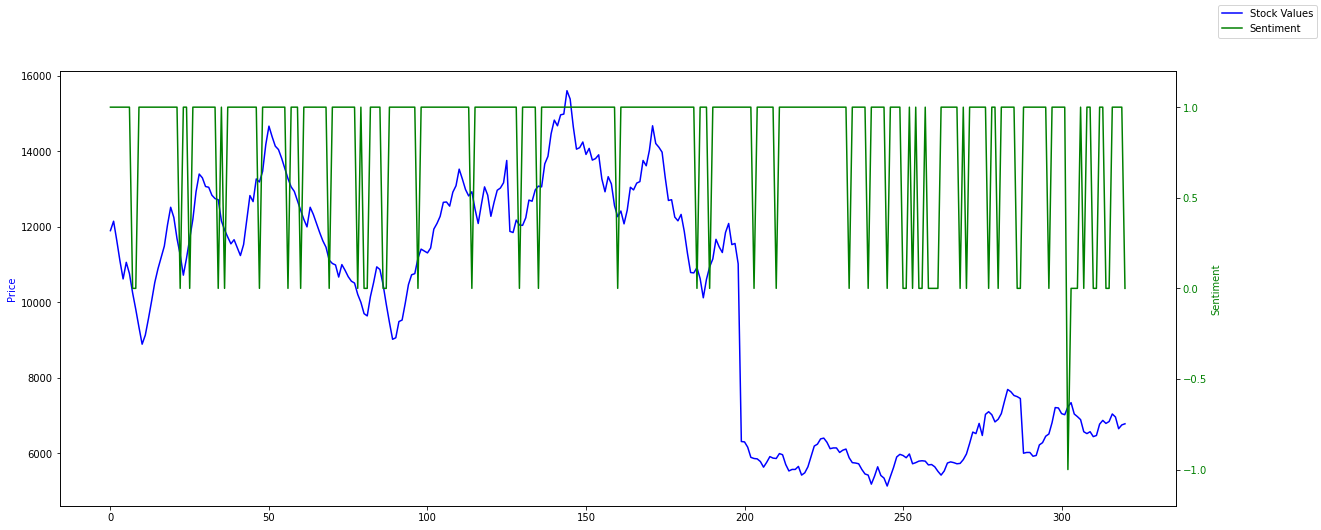

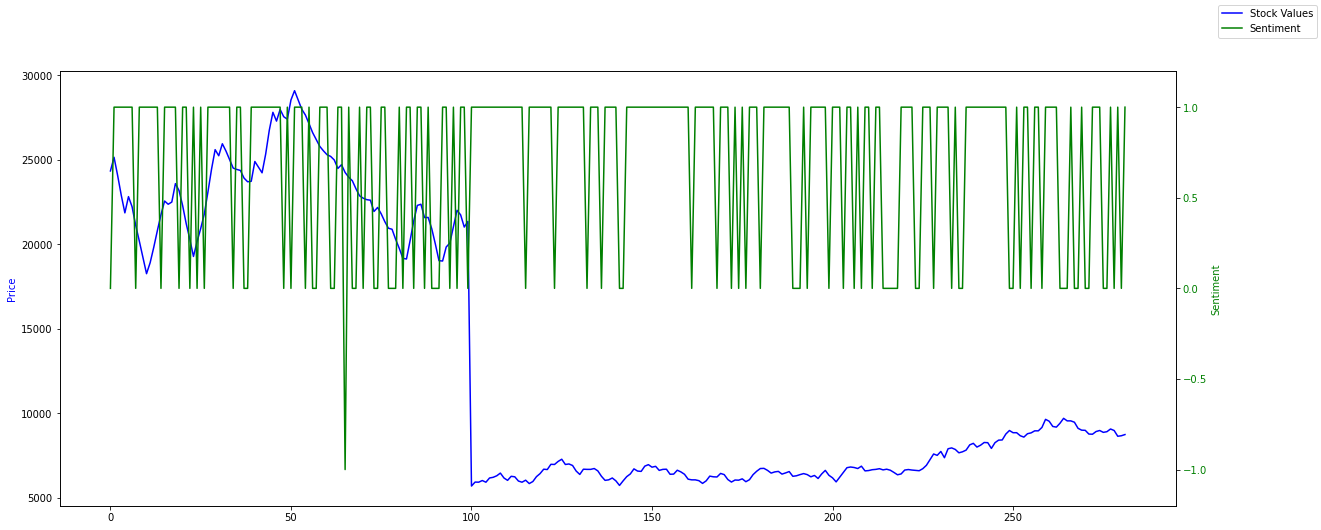

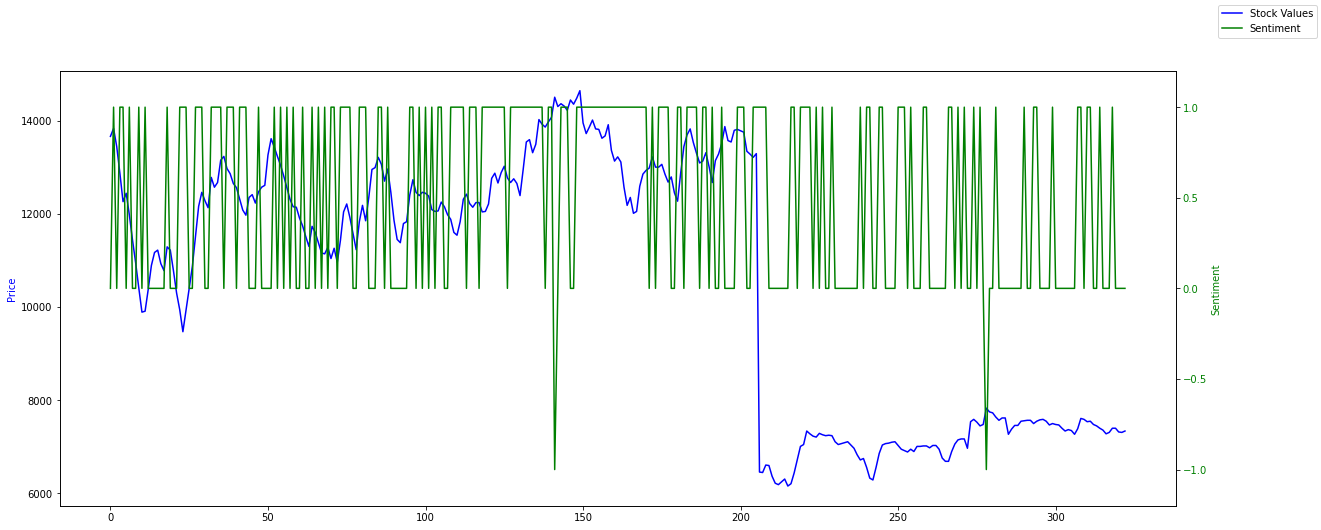

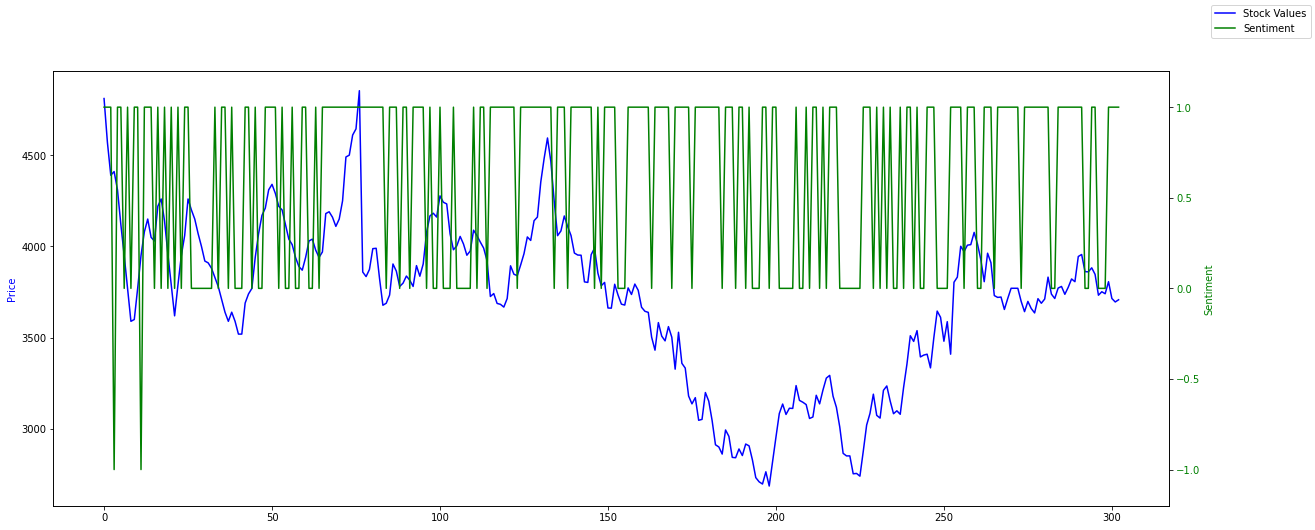

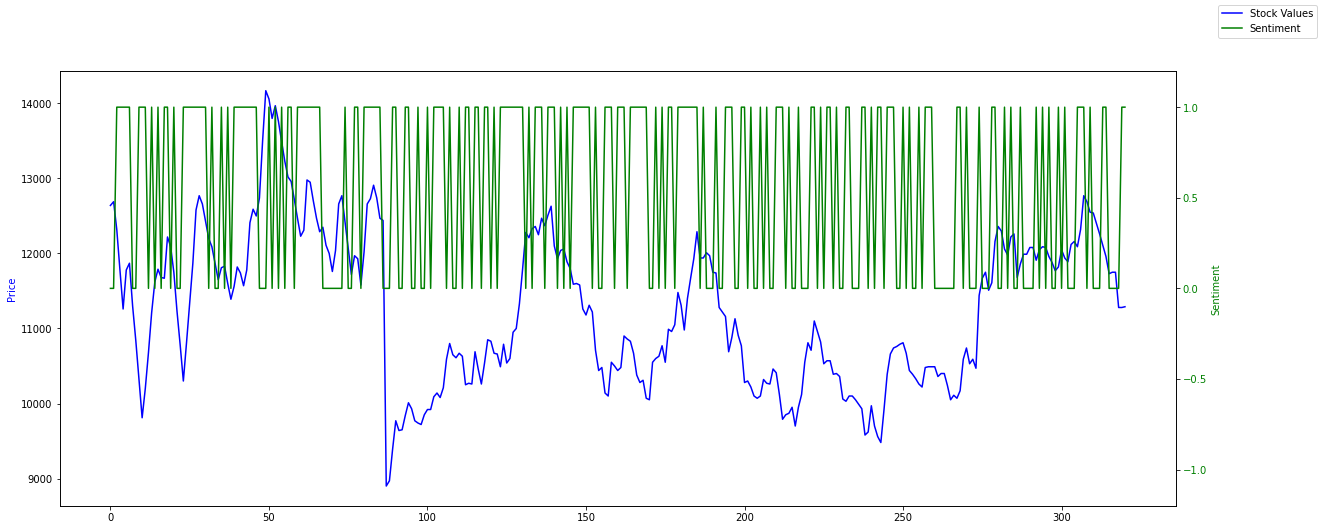

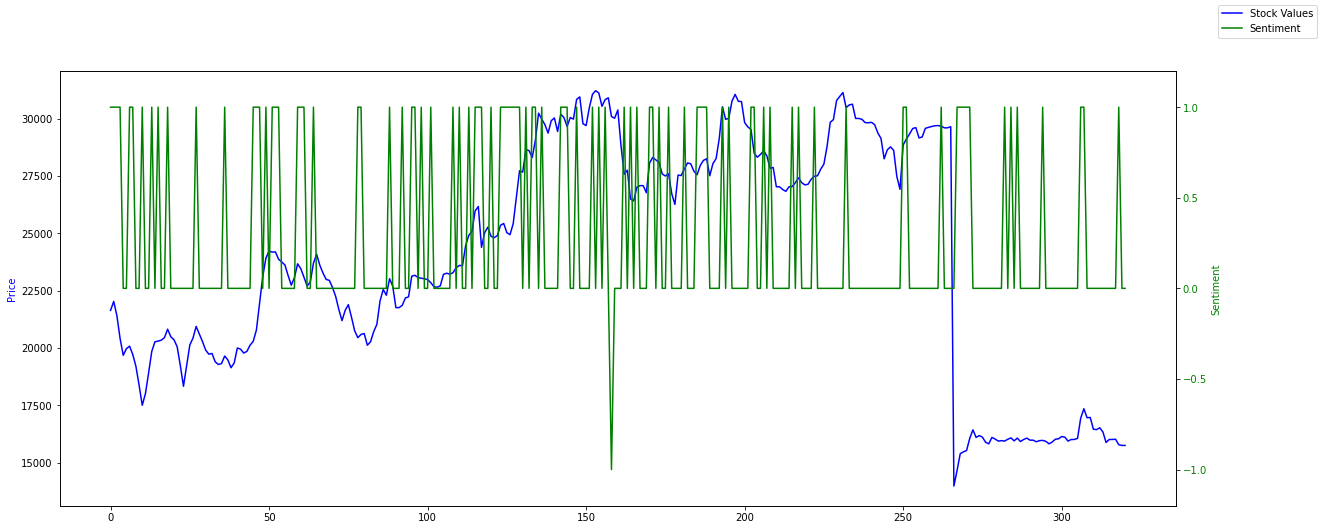

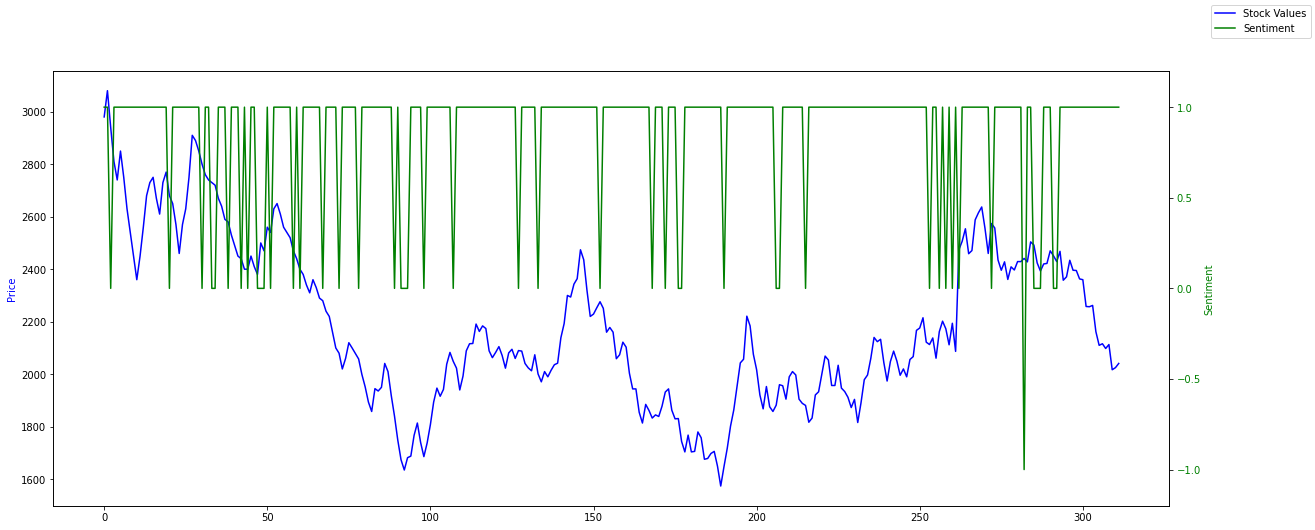

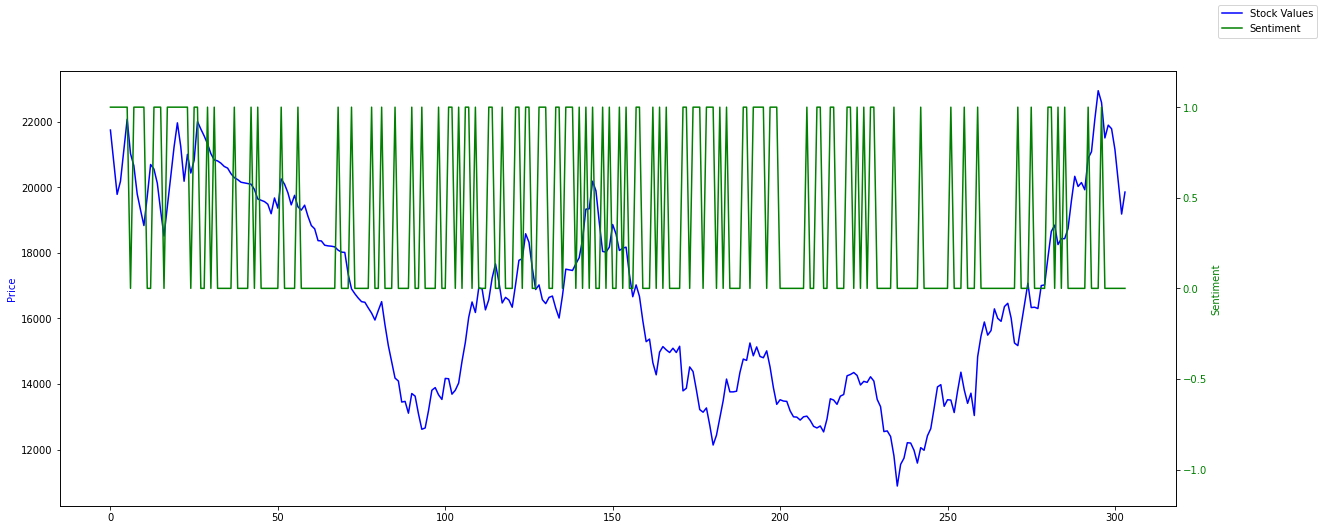

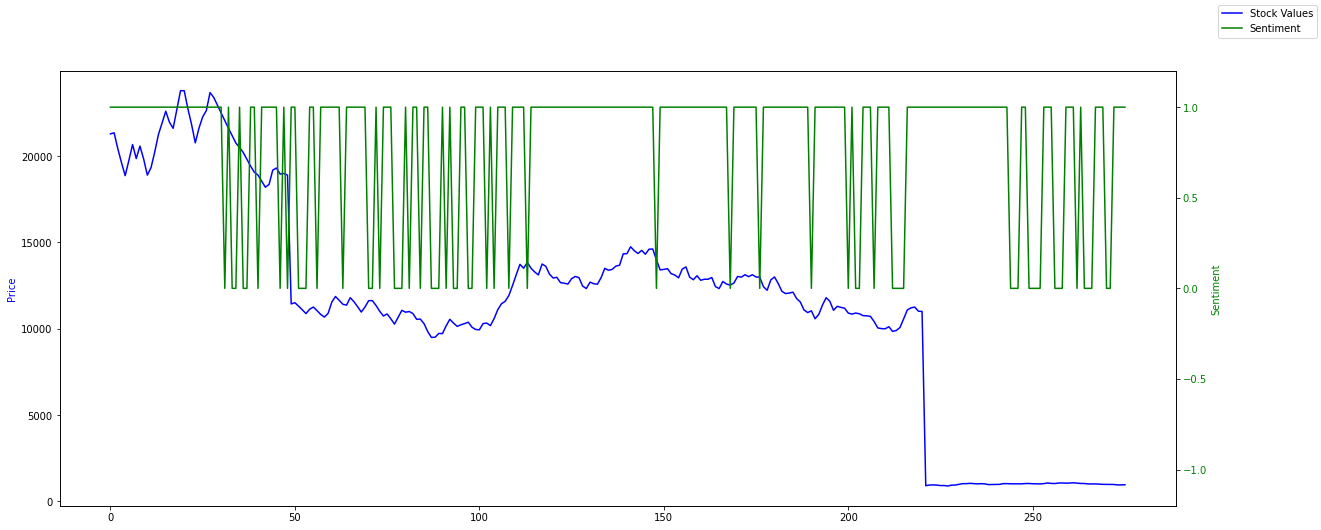

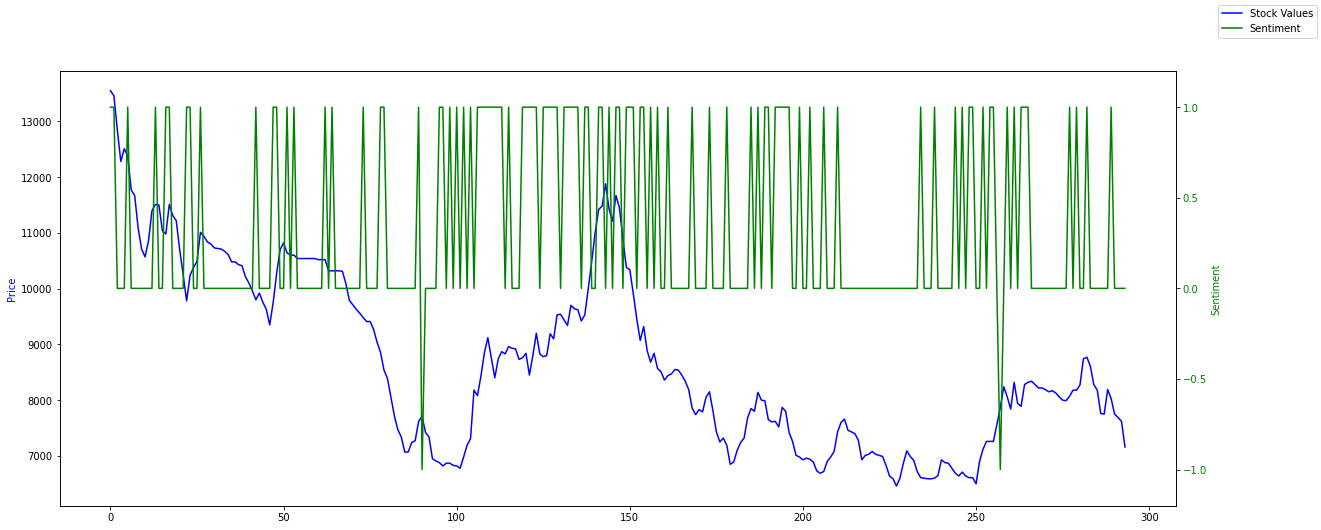

In [ ]:
for symbol in symbols:
  senti_price_chart(symbol)

In [ ]:
def mid_chart(df,dfname):
  fig, ax = plt.subplots()
  ax.plot(df.finish_price, label="Stock Values", color = 'blue')
  ax.plot(df.mid_term_EMA, label="EMA Values", color = 'orange')
  plt.ylabel("Price")
  # Generate a new Axes instance, on the twin-X axes (same position)
  ax2 = ax.twinx()
  ax2.plot(df.mid_term_sentiment_EMA, label= 'Sentiment', color='green')
  ax2.tick_params(axis='y', labelcolor='green')
  plt.ylim(bottom = -1)
  plt.xlabel("Days")
  plt.ylabel("Sentiment")
  plt.title(dfname)
  fig.legend()
  plt.show()


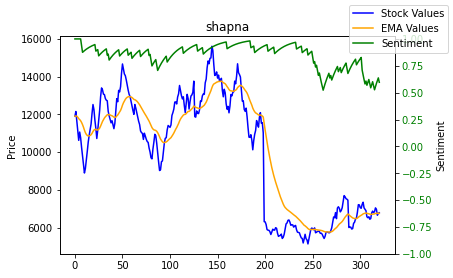

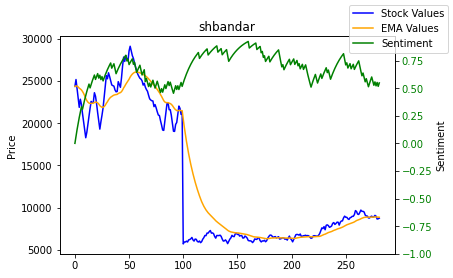

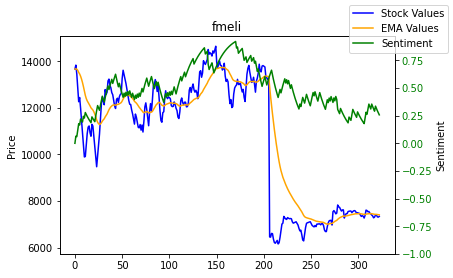

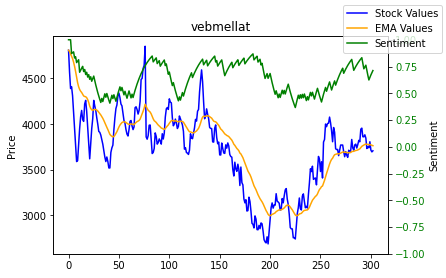

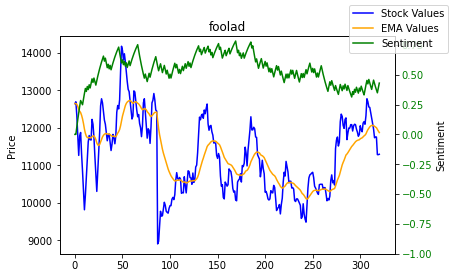

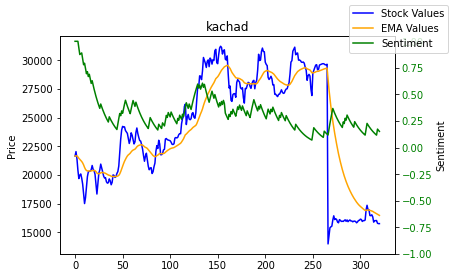

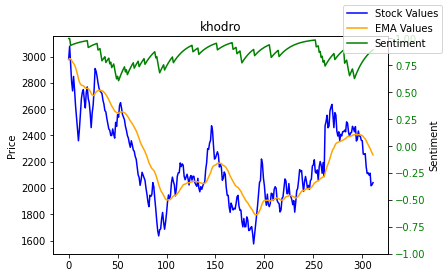

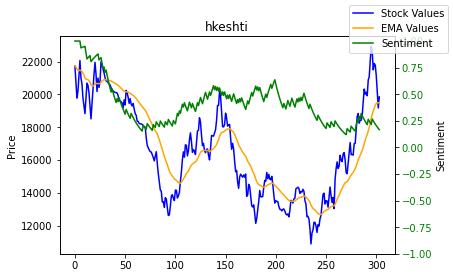

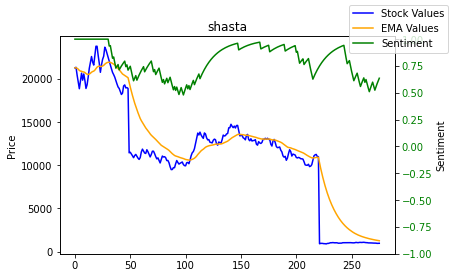

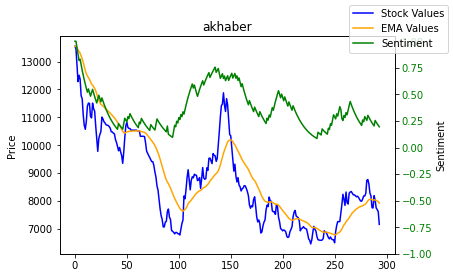

In [ ]:
mid_chart(shapna, 'shapna')
mid_chart(shbandar, 'shbandar')
mid_chart(fmeli, 'fmeli')
mid_chart(vebmellat, 'vebmellat')
mid_chart(foolad, 'foolad')
mid_chart(kachad, 'kachad')
mid_chart(khodro, 'khodro')
mid_chart(hkeshti, 'hkeshti')
mid_chart(shasta, 'shasta')
mid_chart(akhaber, 'akhaber')

In [ ]:
def short_chart(df, dfname):
  fig, ax = plt.subplots()
  ax.plot(df.finish_price, label="Stock Values", color = 'blue')
  ax.plot(df.short_term_EMA, label="EMA Values", color = 'orange')
  plt.ylabel("Price")
  # Generate a new Axes instance, on the twin-X axes (same position)
  ax2 = ax.twinx()
  ax2.plot(df.short_term_sentiment_EMA, label= 'Sentiment', color='green')
  ax2.tick_params(axis='y', labelcolor='green')
  plt.ylim(bottom = -1)
  plt.xlabel("Days")
  plt.ylabel("Sentiment")
  plt.title(dfname)
  fig.legend()
  plt.show()

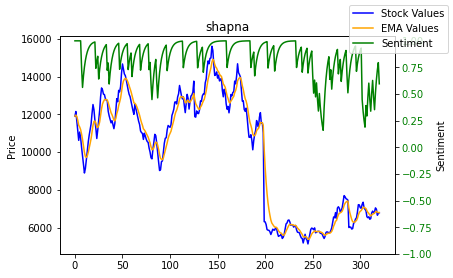

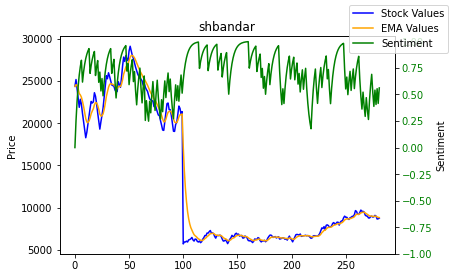

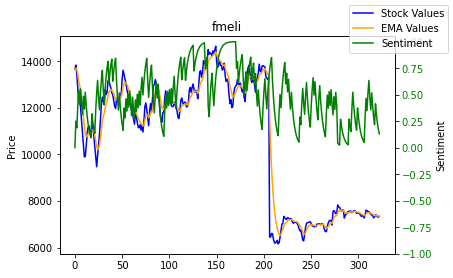

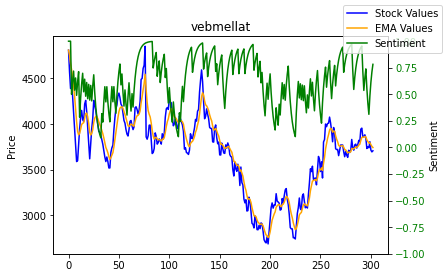

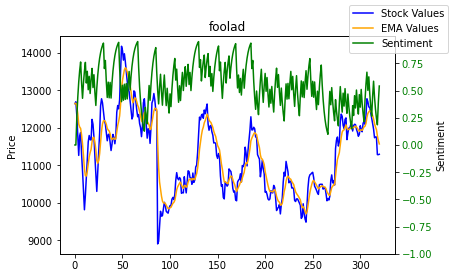

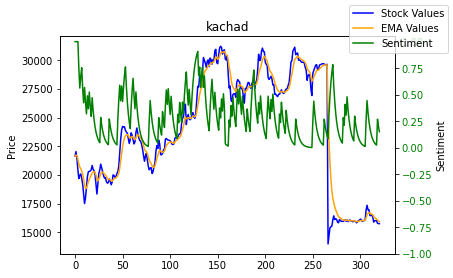

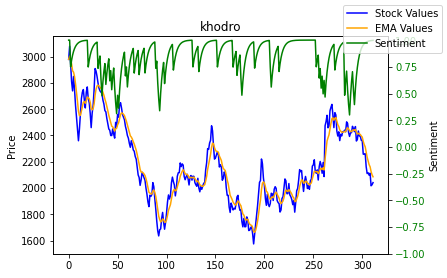

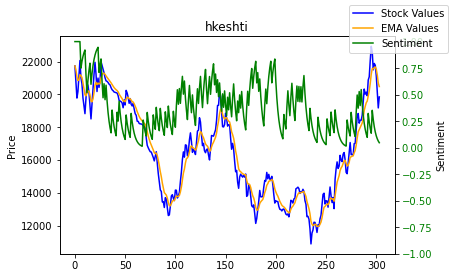

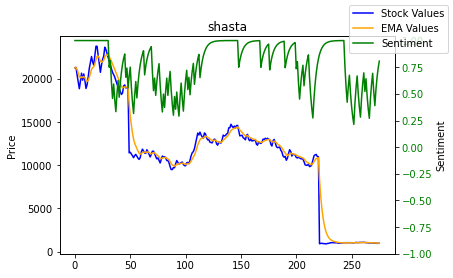

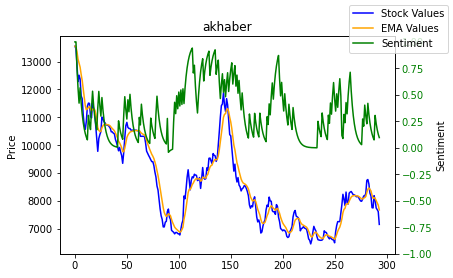

In [ ]:
short_chart(shapna, 'shapna')
short_chart(shbandar, 'shbandar')
short_chart(fmeli, 'fmeli')
short_chart(vebmellat, 'vebmellat')
short_chart(foolad, 'foolad')
short_chart(kachad, 'kachad')
short_chart(khodro, 'khodro')
short_chart(hkeshti, 'hkeshti')
short_chart(shasta, 'shasta')
short_chart(akhaber, 'akhaber')

# Cross-Corelation

In [ ]:
def crosscorr(col1, col2, lag=0, method='pearson'):
    """ Lag-N cross correlation.
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    cov = col1.corr(col2.shift(lag), method= method)
    return cov

In [ ]:
def corr_chart(df, dfname):
  xcov = [crosscorr(df.sentiment, shapna.finish_price, lag=i, method="pearson") for i in range(-20,20)]
  plt.plot(range(-20,20), xcov)
  plt.title(f"pearson cross-correlation ({dfname})")
  plt.xlabel("lag")
  plt.ylabel("correlation")
  plt.show()

  xcov = [crosscorr(df.sentiment.astype(float), shapna.finish_price, lag=i, method="kendall") for i in range(-20,20)]
  plt.plot(range(-20,20), xcov)
  plt.title(f"kendall cross-correlation ({dfname})")
  plt.xlabel("lag")
  plt.ylabel("correlation")
  plt.show()

  xcov = [crosscorr(shapna.sentiment.astype(float), shapna.finish_price, lag=i, method="spearman") for i in range(-20,20)]
  plt.plot(range(-20,20), xcov)
  plt.title(f"spearman cross-correlation ({dfname})")
  plt.xlabel("lag")
  plt.ylabel("correlation")
  plt.show()

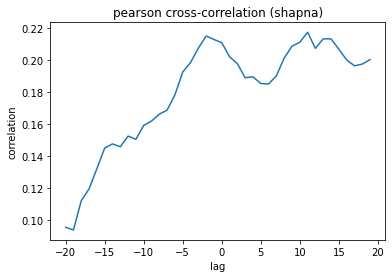

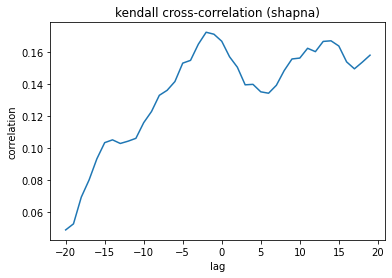

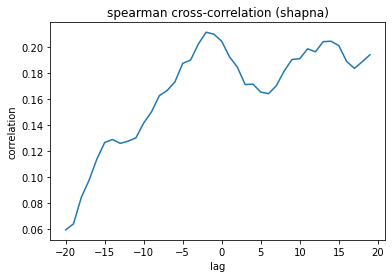

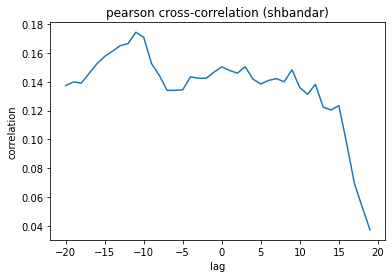

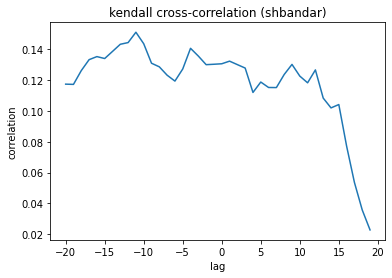

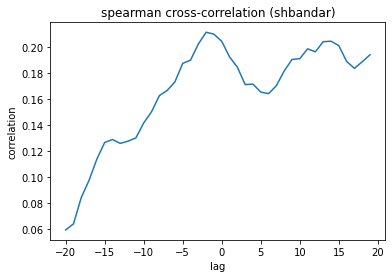

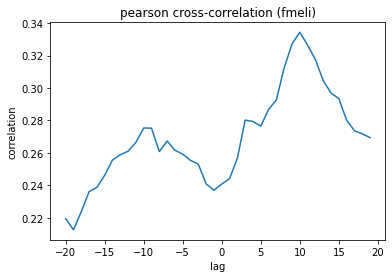

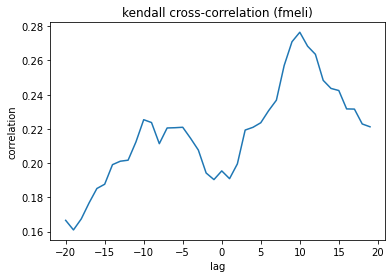

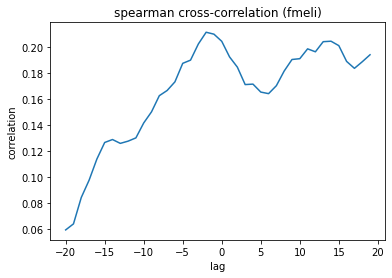

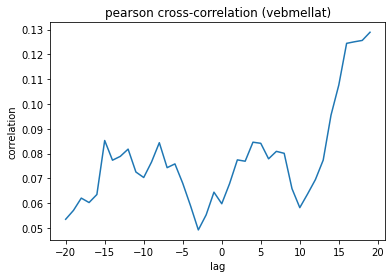

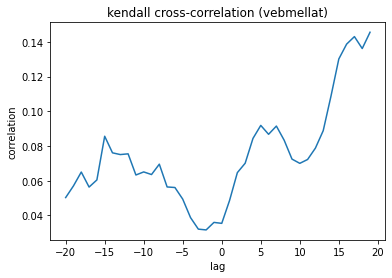

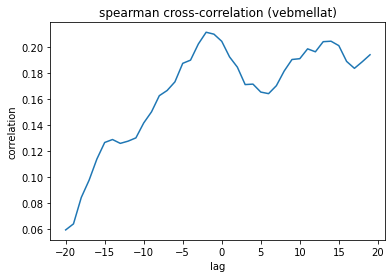

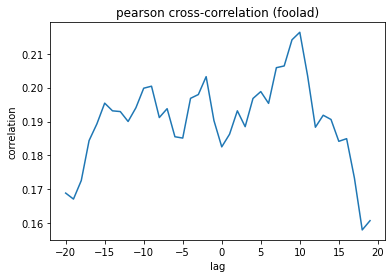

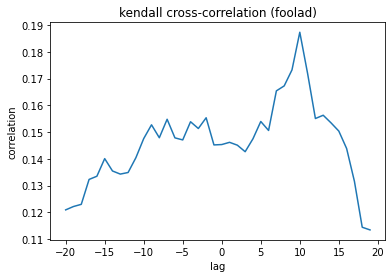

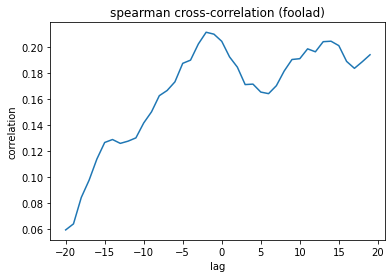

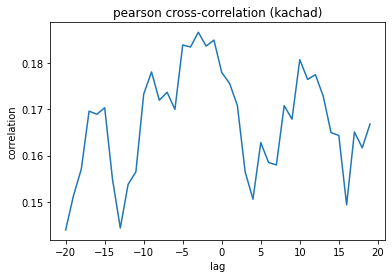

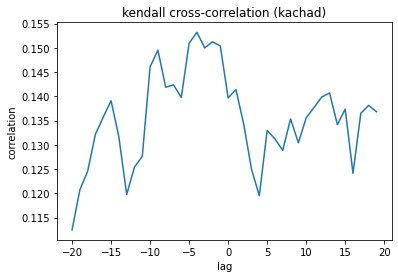

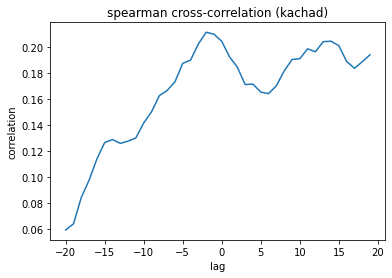

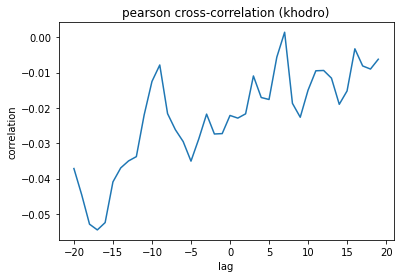

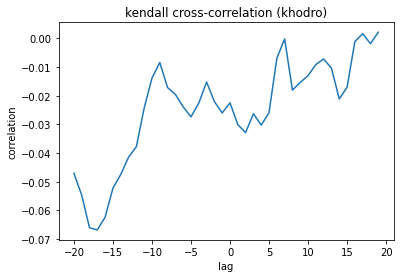

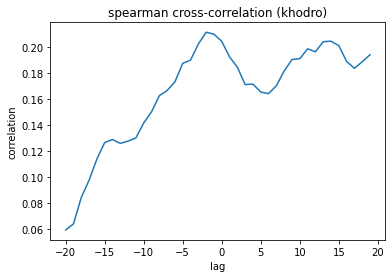

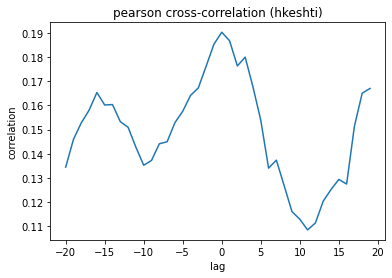

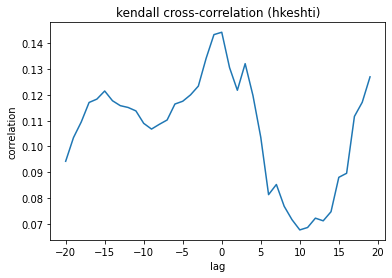

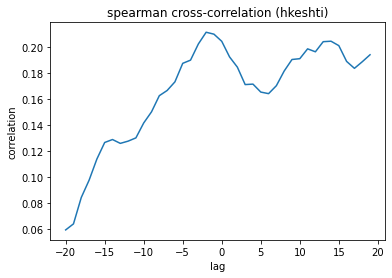

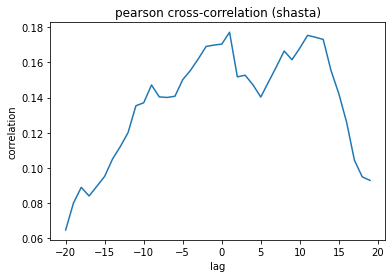

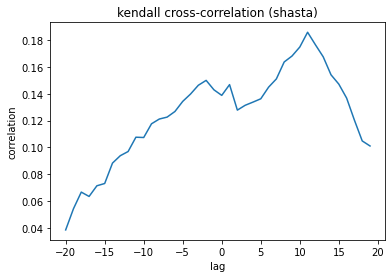

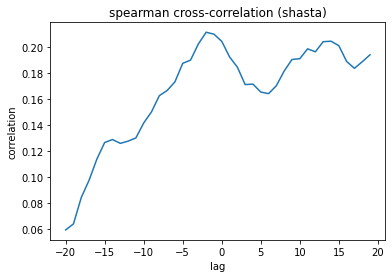

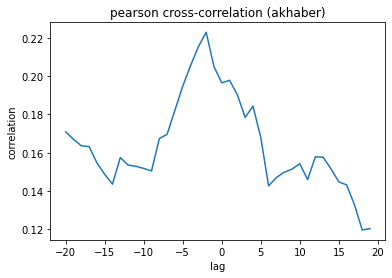

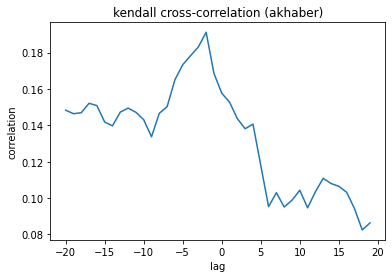

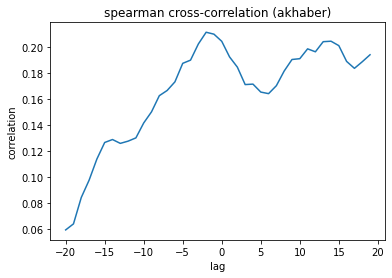

In [ ]:
corr_chart(shapna, 'shapna')
corr_chart(shbandar, 'shbandar')
corr_chart(fmeli, 'fmeli')
corr_chart(vebmellat, 'vebmellat')
corr_chart(foolad, 'foolad')
corr_chart(kachad, 'kachad')
corr_chart(khodro, 'khodro')
corr_chart(hkeshti, 'hkeshti')
corr_chart(shasta, 'shasta')
corr_chart(akhaber, 'akhaber')

In [ ]:
def correlation(df):
  spearman = df['sentiment'].corr(df['finish_price'], method='spearman')
  pearson = df['sentiment'].corr(df['finish_price'], method='pearson')
  kendall = df['sentiment'].corr(df['finish_price'], method='kendall')
  return spearman, pearson, kendall

In [ ]:
for symbol in symbols:
  print(correlation(symbol))

(0.20449479865682835, 0.210861109683974, 0.16697972111713608)
(-0.11460658315948866, -0.10008064061165327, -0.09406667244609711)
(0.2673636308914439, 0.27330673383058496, 0.21849759245234018)
(0.08877076798338601, 0.11628987788852867, 0.07268585727993705)
(0.04122333529008963, 0.03522969072555327, 0.03376370542818463)
(0.03167679451812948, 0.03856999417306603, 0.025966328822883602)
(-0.057814646462735354, -0.05990142929793733, -0.047074014792304296)
(0.07481139554921819, 0.06703687400121797, 0.061211261254161056)
(0.22253935873001618, 0.15010684489940276, 0.18215483203885213)
(0.09030668369040269, 0.08190870405257591, 0.07293488629143656)


In [ ]:
vebmellat[['date','finish_price','yesterday_price', 'sentiment', 'price_change']][75:89]

,date,finish_price,yesterday_price,sentiment,price_change
75,2021-05-03,4644.0,4610.0,1.0,1.0
76,2021-05-05,4853.0,4644.0,1.0,1.0
77,2021-05-24,3860.0,4853.0,1.0,-1.0
78,2021-05-25,3835.0,3860.0,1.0,-1.0
79,2021-05-26,3874.0,3835.0,1.0,1.0
80,2021-05-29,3988.0,3874.0,1.0,1.0
81,2021-05-30,3990.0,3988.0,1.0,1.0
82,2021-05-31,3825.0,3990.0,1.0,-1.0
83,2021-06-01,3678.0,3825.0,1.0,-1.0
84,2021-06-02,3689.0,3678.0,0.0,1.0
